# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.66'

## Specifying filetype, and folder as before

In [28]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, filetype, prefix, prefix_str, file_ext, TruPower=pf.get_settings()

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [29]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong')
batch='Weak' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')

### Now load one file from this group to tweak parameters for

In [30]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

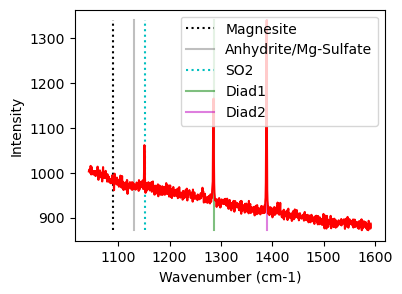

In [31]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [32]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [33]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250), upper_bck_diad1=(1300, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=243.99527886946794, HB_prom=nan, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_cent_err  Diad1_Voigt_Area  \
0          1285.314359       1285.314359        0.017601        504.813674   

   Diad1_Voigt_Sigma  Diad1_Voigt_Gamma  Diad1_Combofit_Height  \
0           0.736764                  0             253.260032   

   Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm        Diad1_refit  
0        5.263278        0.661905    1.473529  Flagged Warnings:

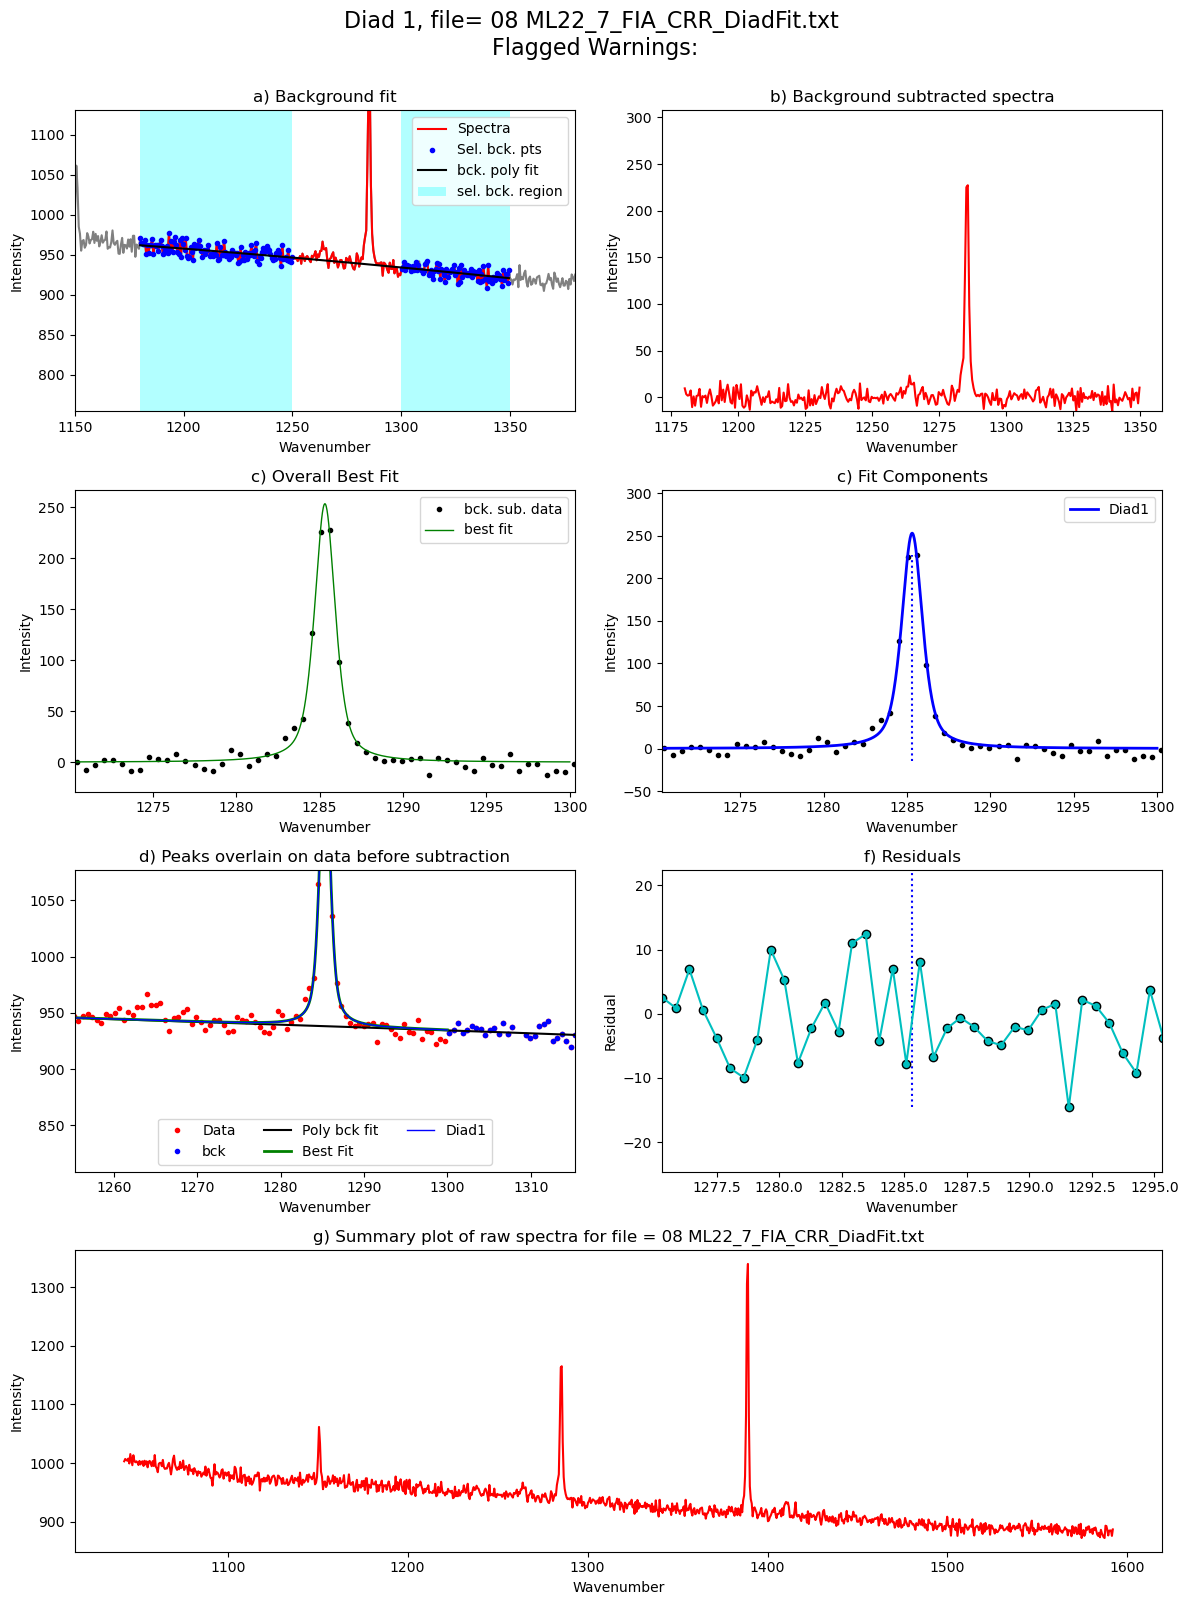

In [34]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [35]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [36]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1360), upper_bck_diad2=(1430, 1480), fit_gauss=False, gauss_amp=1000, diad_sigma=0.4, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=456.2409086123264, HB_prom=30.83358802506723, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False, C13_prom=10)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1388.844717       1388.844667        0.007766        781.072324   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma     HB2_Cent   HB2_Area  HB2_Sigma  \
0           0.616267                  0  1410.448026  83.381779   1.248366   

   Diad2_Combofit_Height  Diad2_Residual  Diad2_Prop_Lor  Diad2_fwhm  \
0             475.732245        5.128275        0.623475    1.232535   

         Diad2_refit  
0  Flagged Warnings:

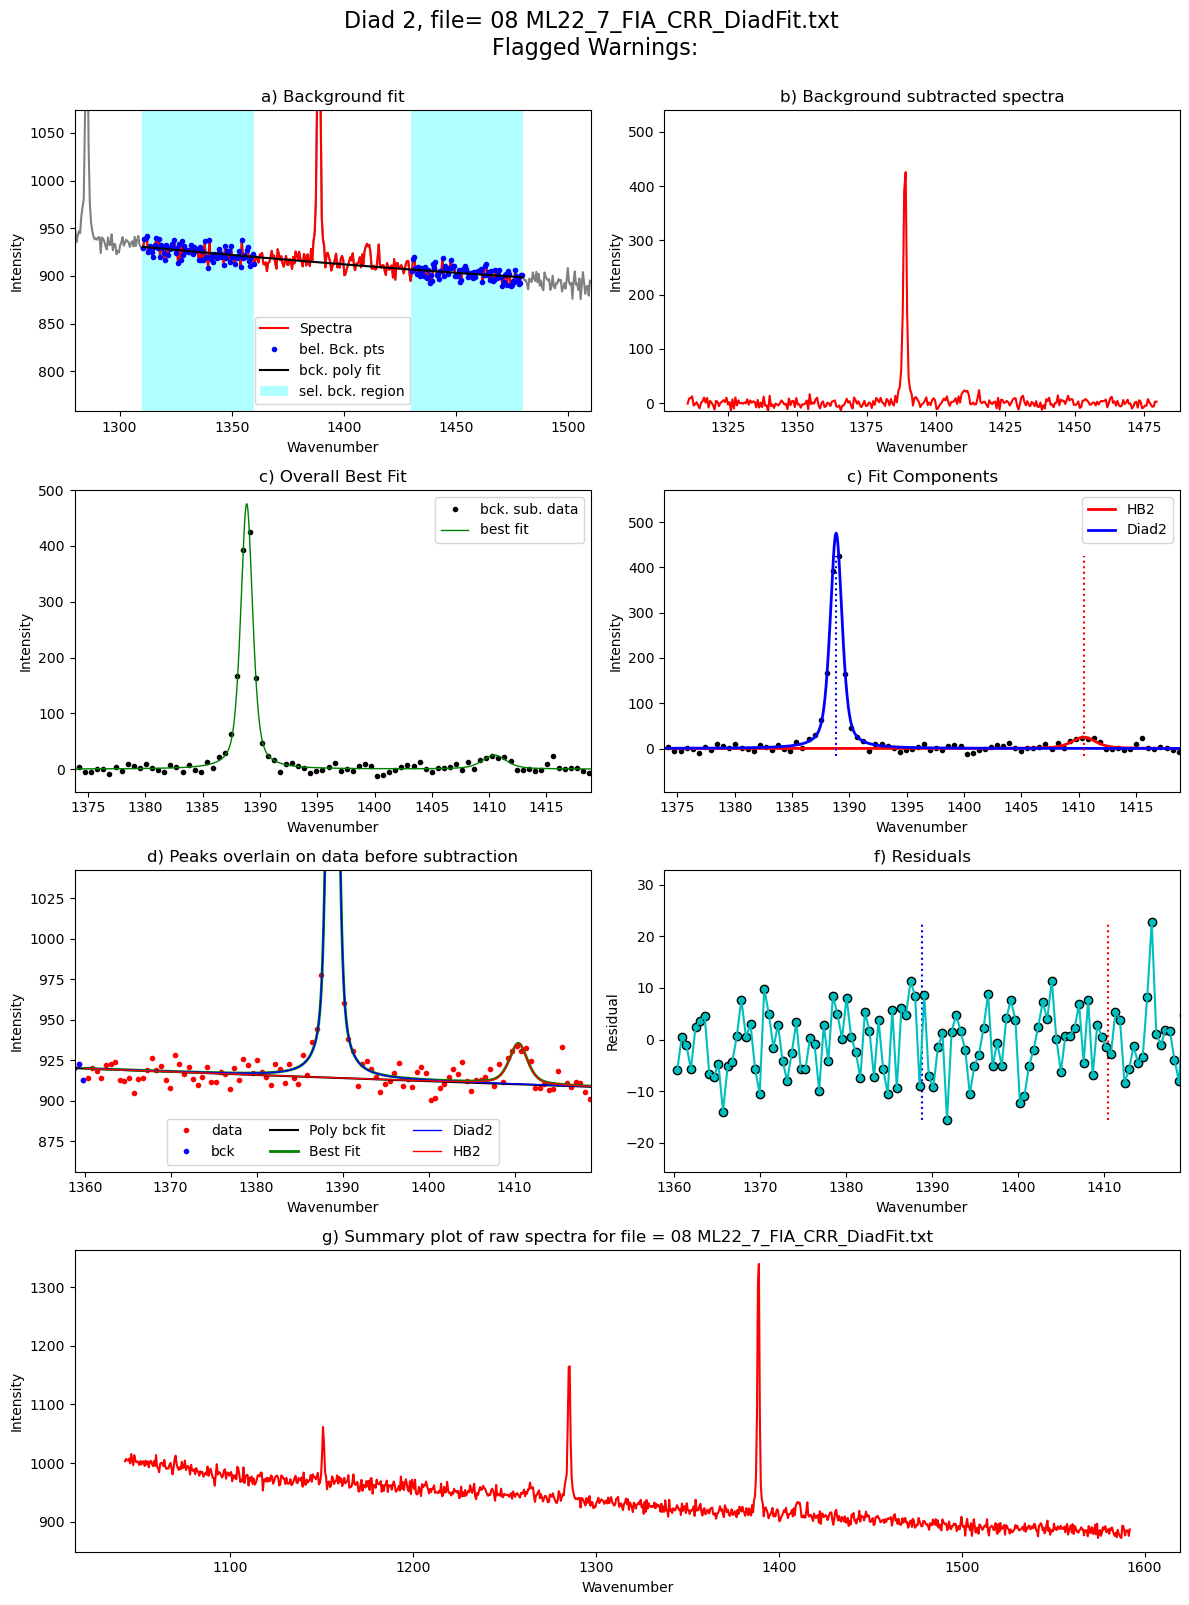

In [37]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/12 [00:00<?, ?it/s]

Processing file: 08 ML22_7_FIA_CRR_DiadFit.txt


  8%|▊         | 1/12 [00:02<00:29,  2.65s/it]

Processing file: 09 ML22_7_FIB_doublepeak_CRR_DiadFit.txt


 17%|█▋        | 2/12 [00:05<00:26,  2.67s/it]

Processing file: 10 ML22_7_FIC_doublepeak_CRR_DiadFit.txt
refit attempt 1


 25%|██▌       | 3/12 [00:07<00:23,  2.65s/it]

Processing file: 12 ML22_13_FIA_CRR_DiadFit.txt


 33%|███▎      | 4/12 [00:10<00:22,  2.78s/it]

Processing file: 13 ML22_13_FIB.txt


 42%|████▏     | 5/12 [00:13<00:18,  2.67s/it]

Processing file: 17 M22_16_FIB.txt


 50%|█████     | 6/12 [00:16<00:16,  2.68s/it]

Processing file: 20 M22_16_FIC.txt


 58%|█████▊    | 7/12 [00:18<00:12,  2.56s/it]

Processing file: 21 M22_16_MIA.txt


 67%|██████▋   | 8/12 [00:20<00:10,  2.50s/it]

Processing file: 23 ML22_11_MIA_CRR_DiadFit.txt


 75%|███████▌  | 9/12 [00:23<00:07,  2.63s/it]

Processing file: 24 ML22_11_MIA_20mW.txt


 83%|████████▎ | 10/12 [00:26<00:05,  2.62s/it]

Processing file: 25 ML22_11_MIB.txt


g:\my drive\berkeley_new\diadfit_outer\src\DiadFit\diads.py:2969: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 16))
 92%|█████████▏| 11/12 [00:29<00:02,  2.73s/it]

Processing file: 28 M22_9_MIA.txt


100%|██████████| 12/12 [00:33<00:00,  2.82s/it]


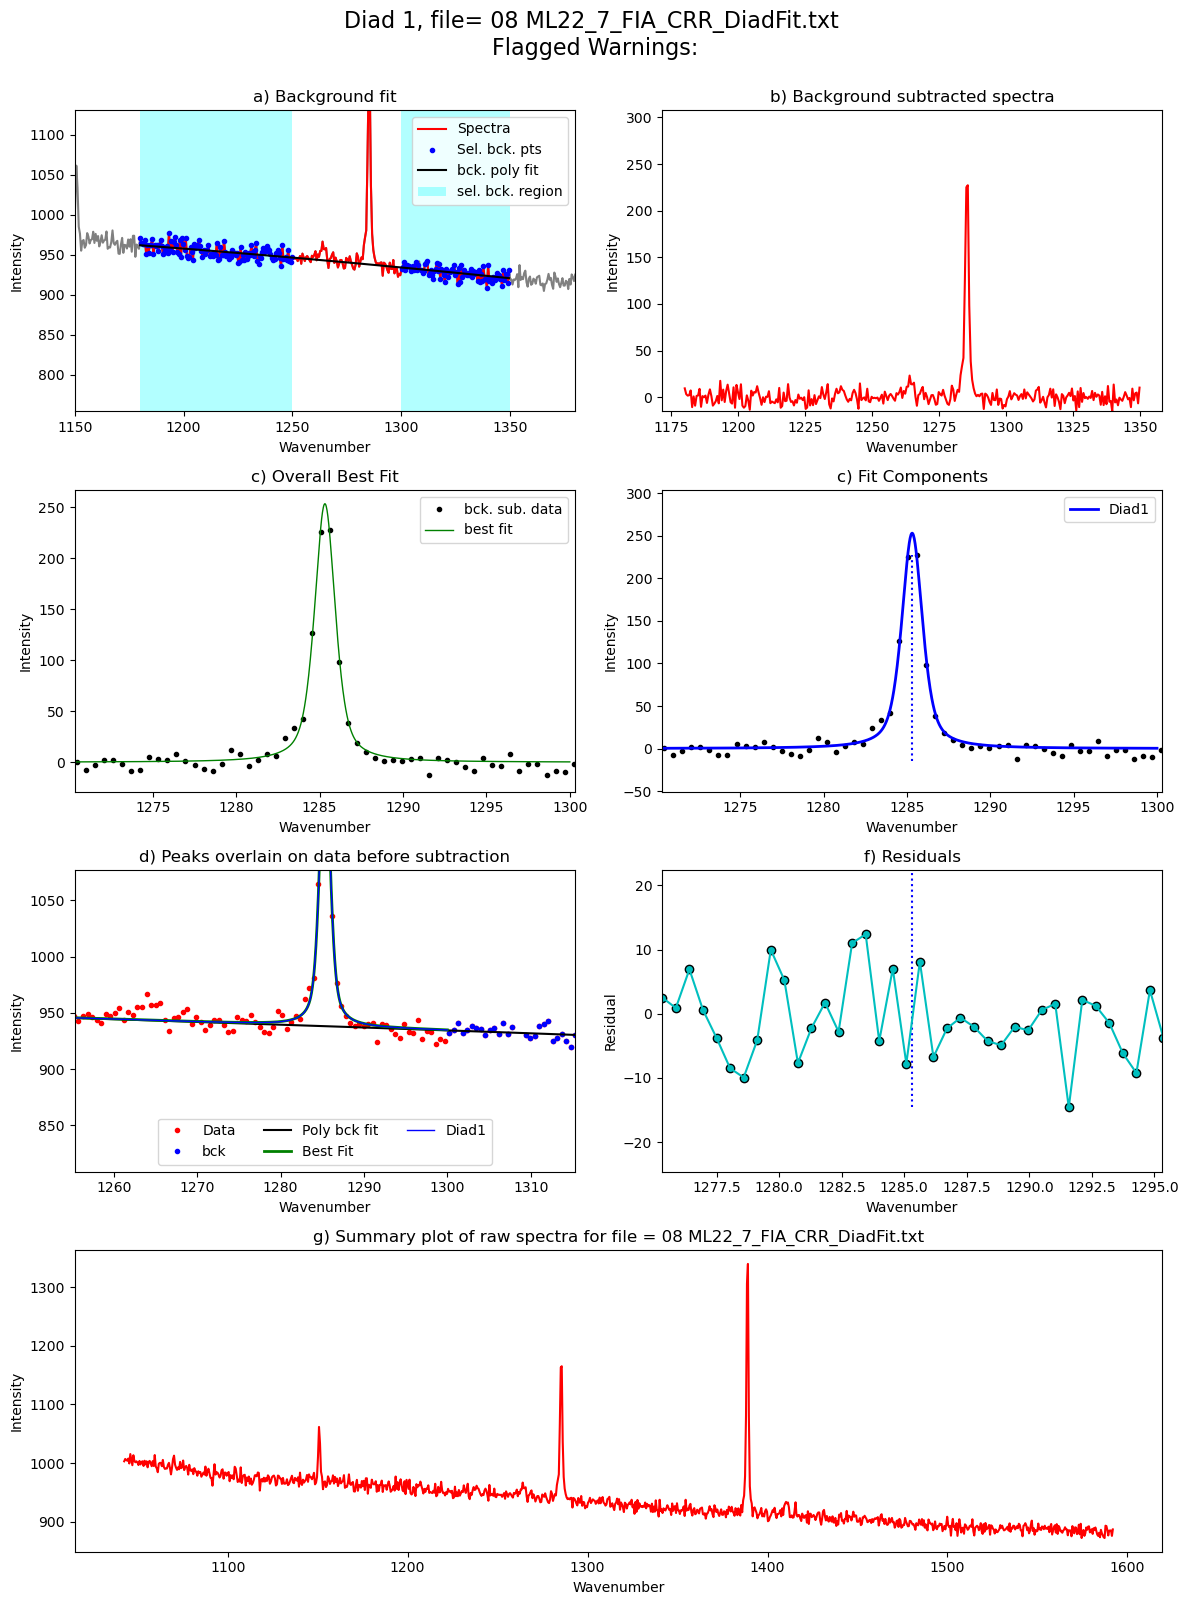

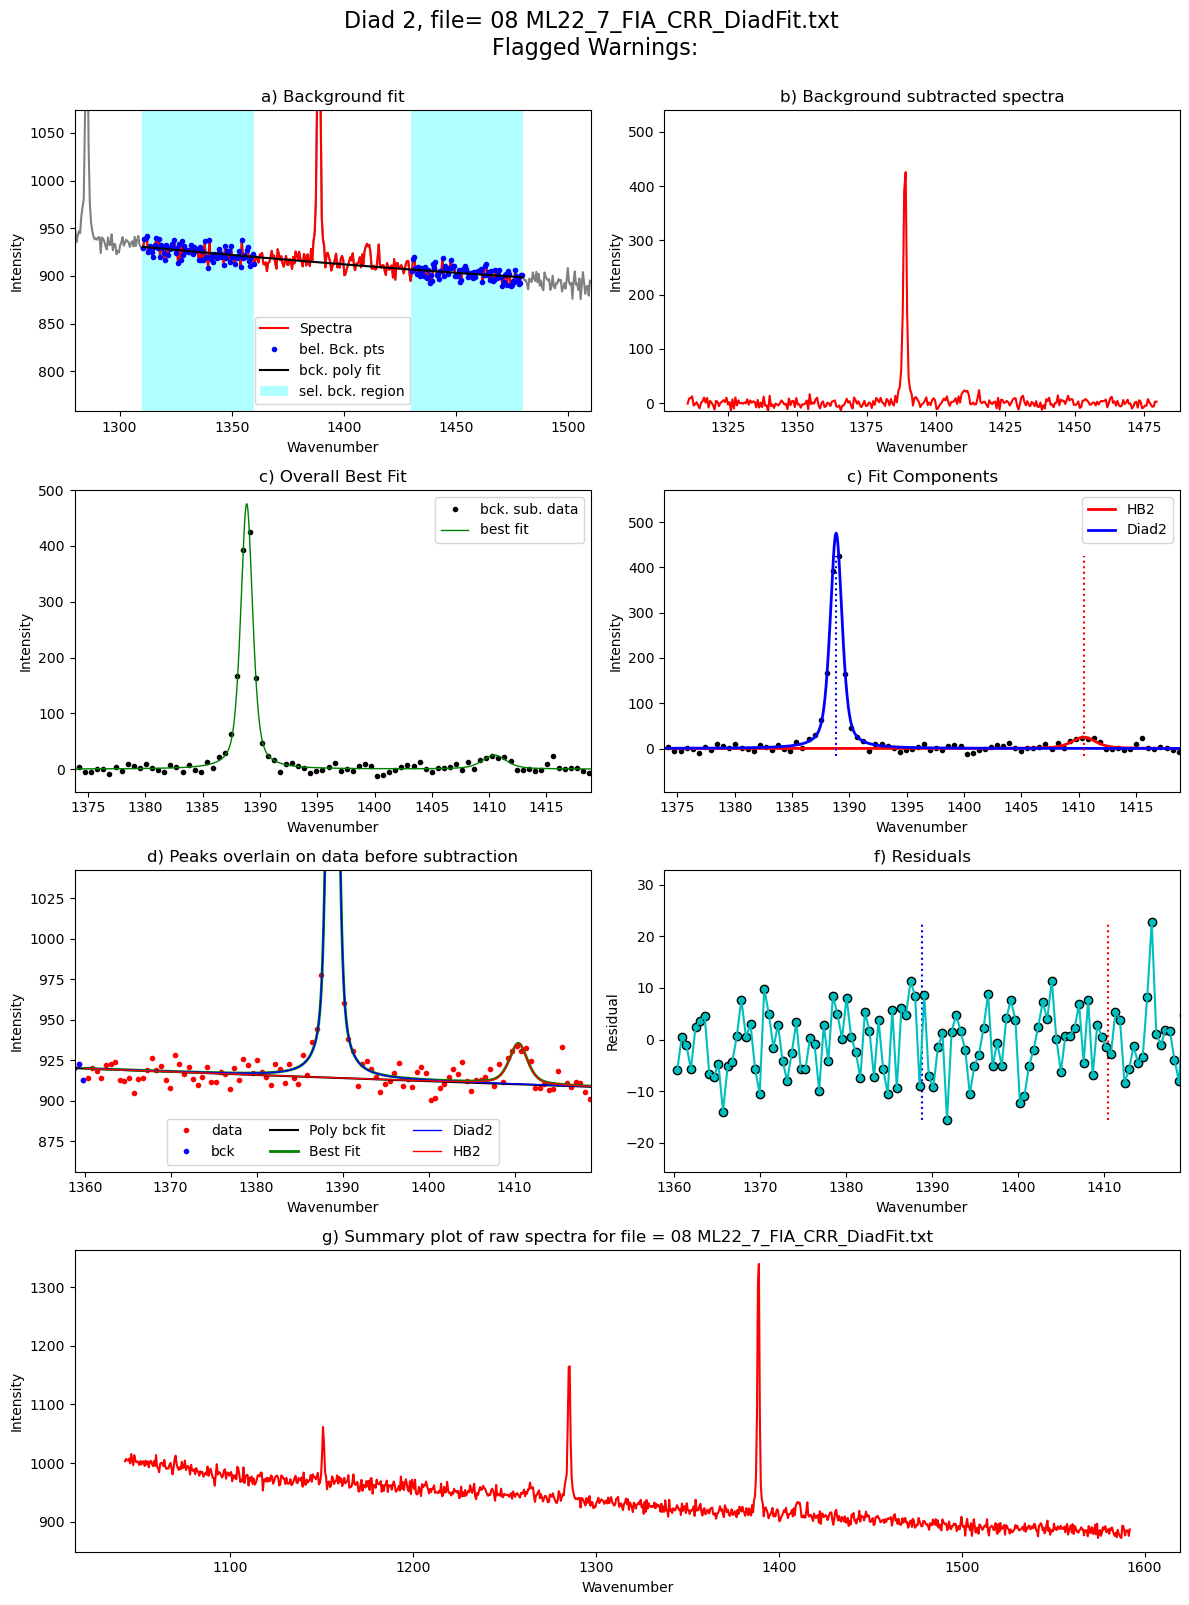

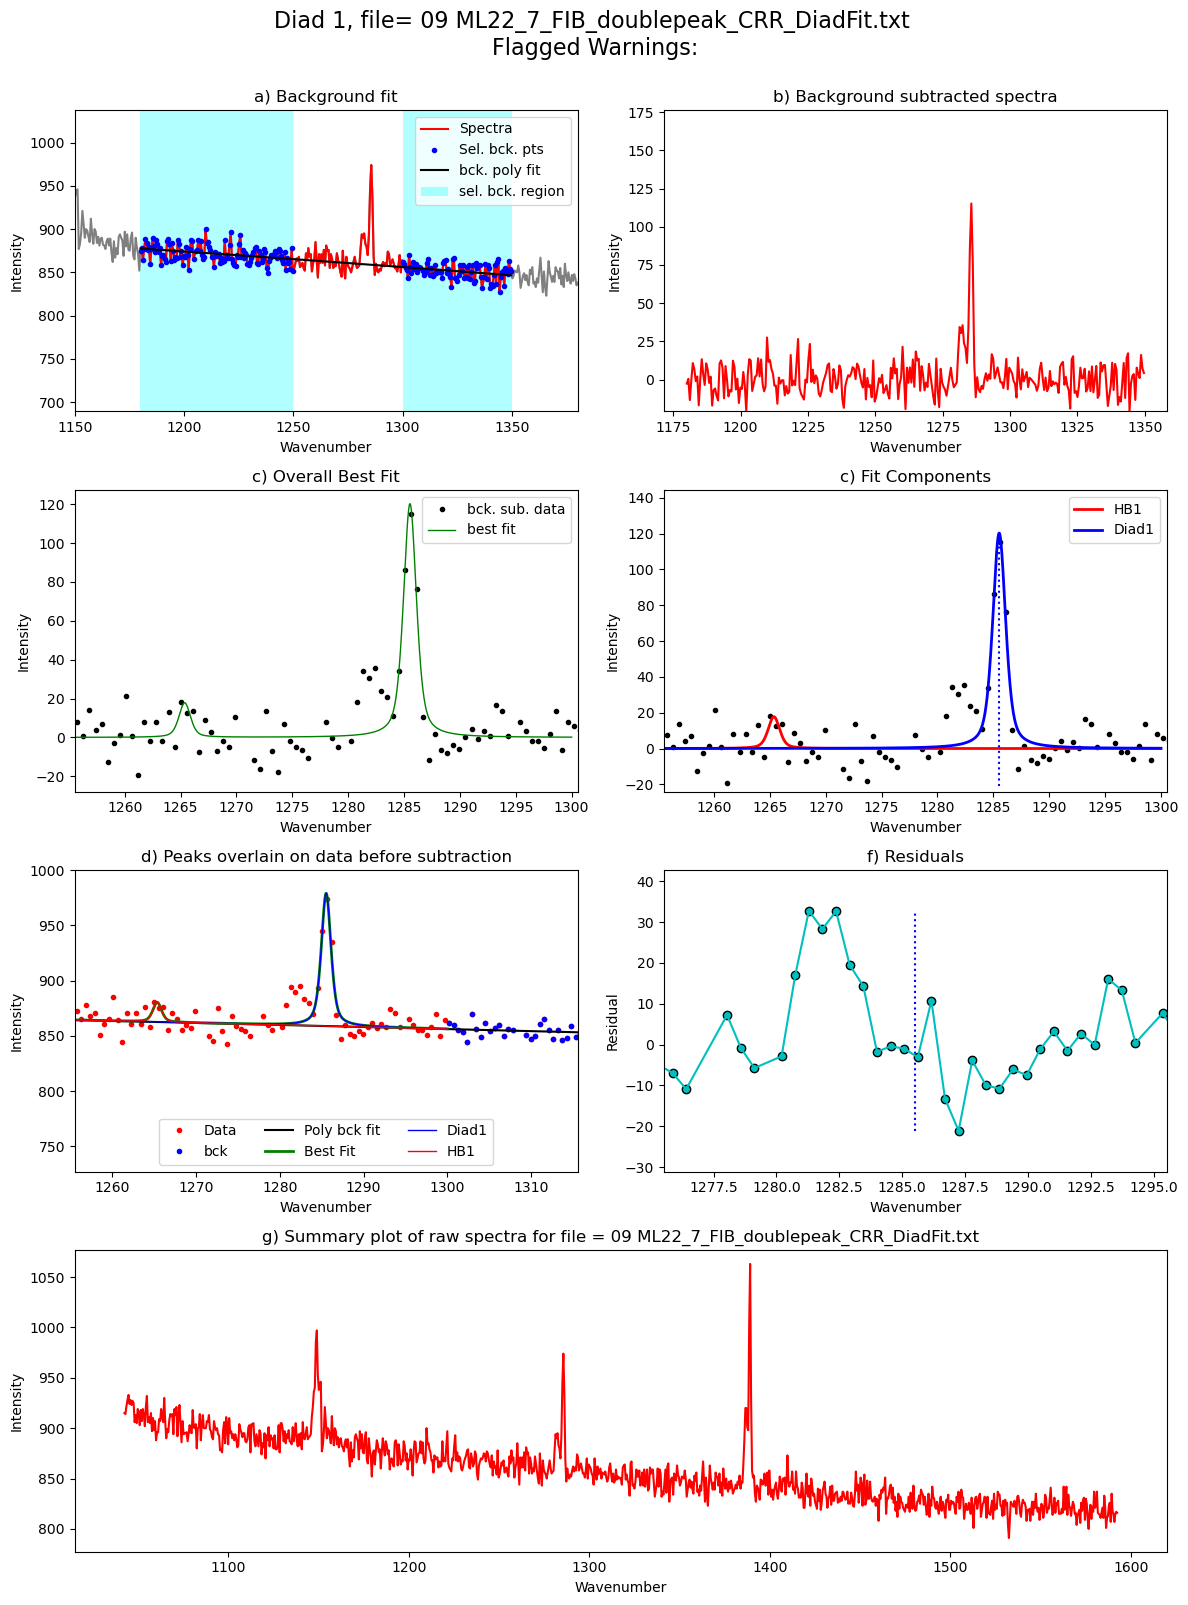

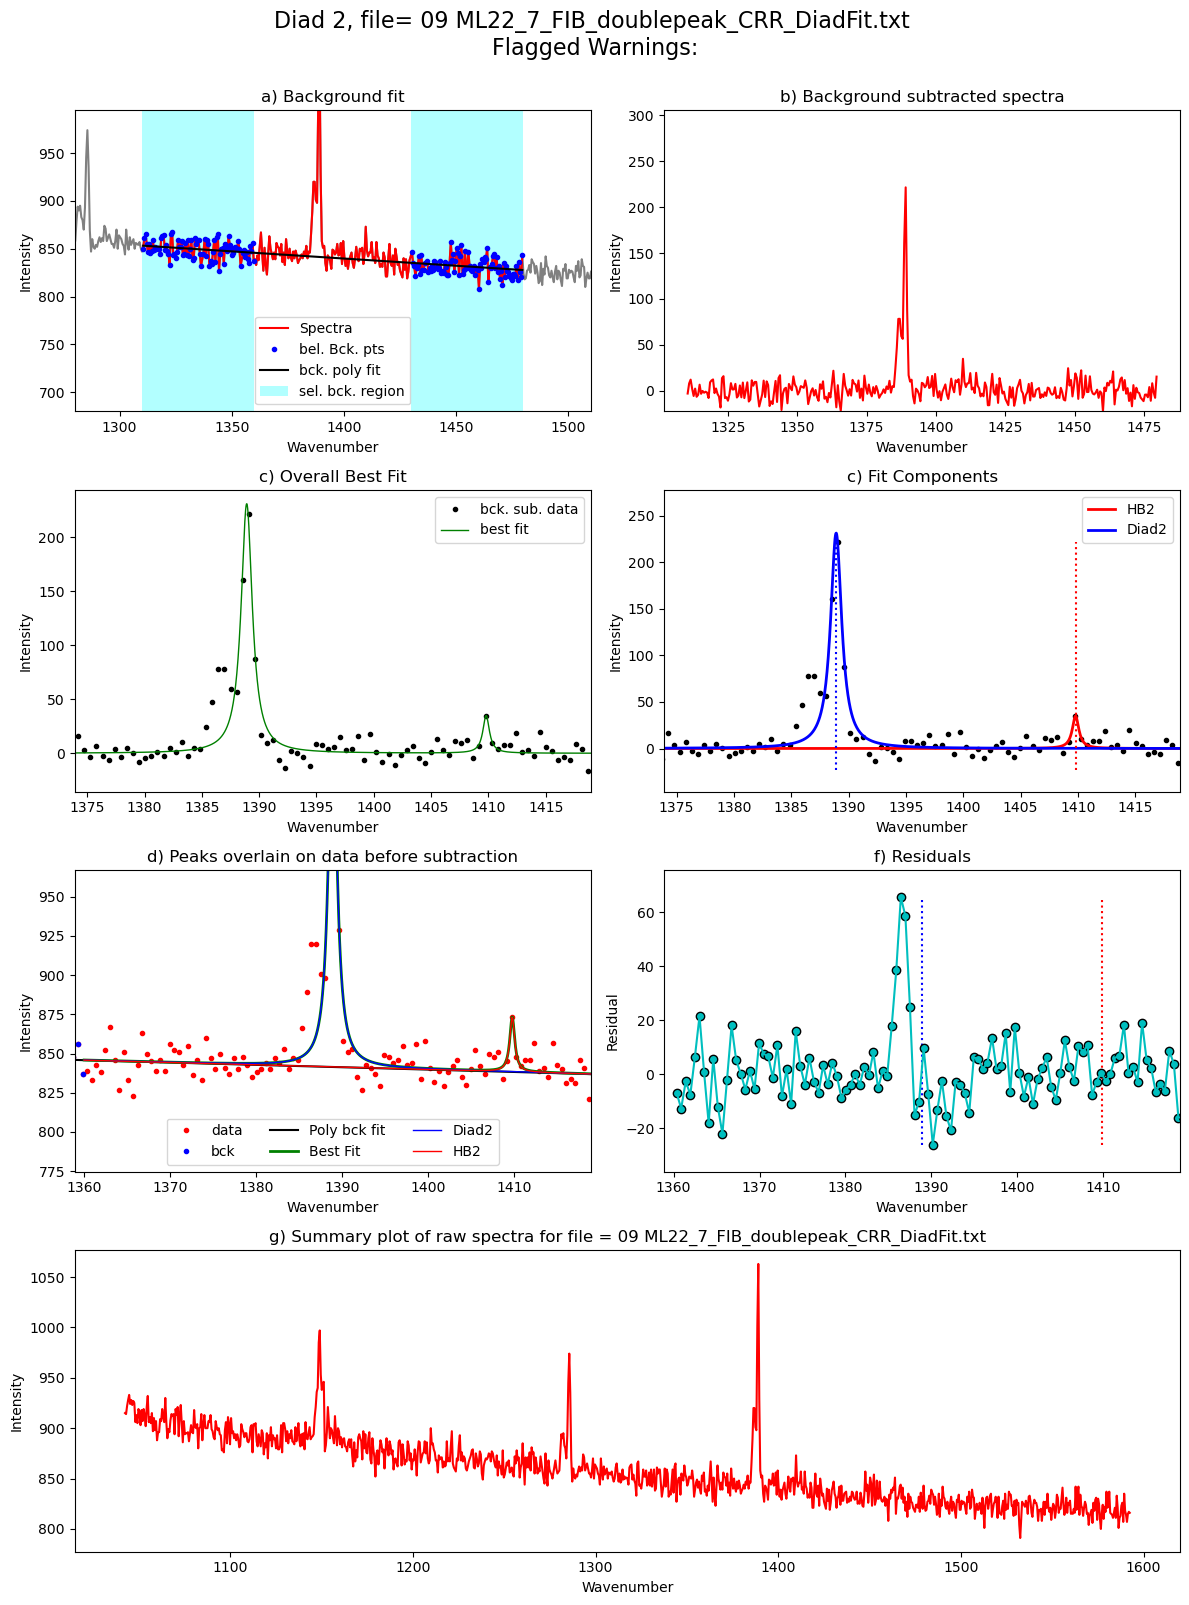

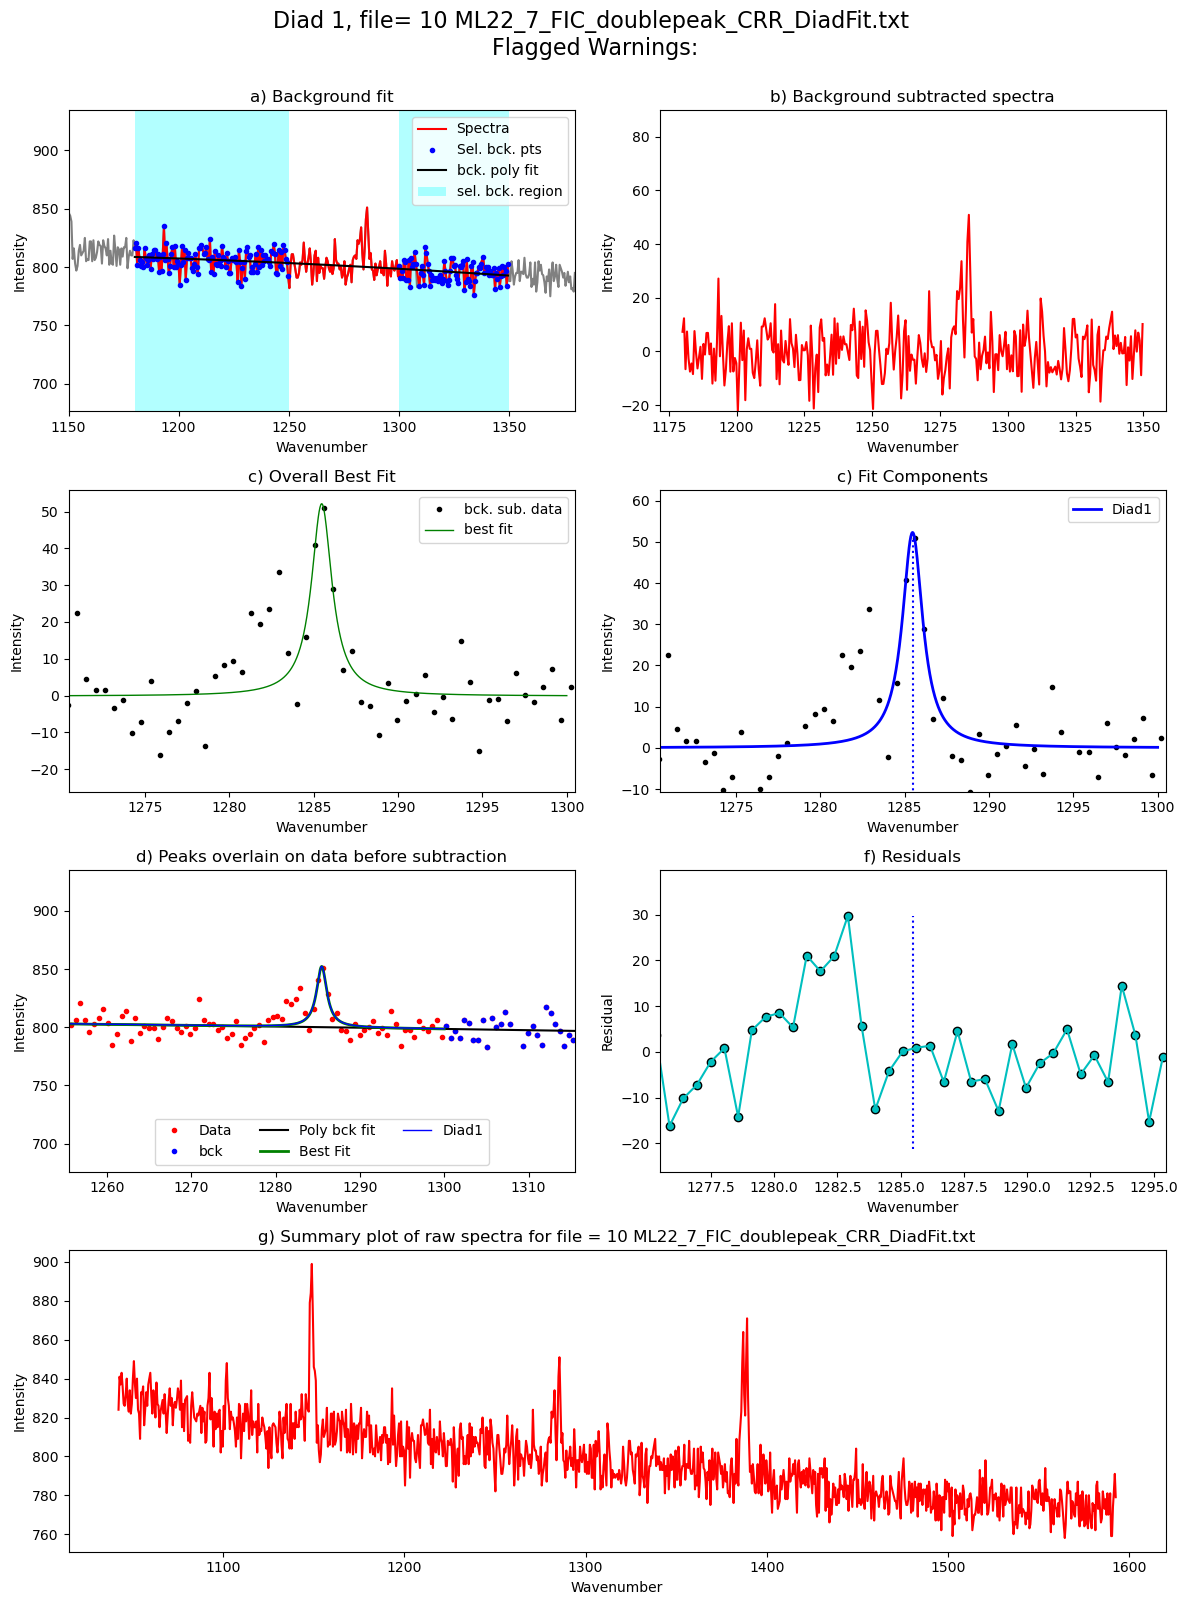

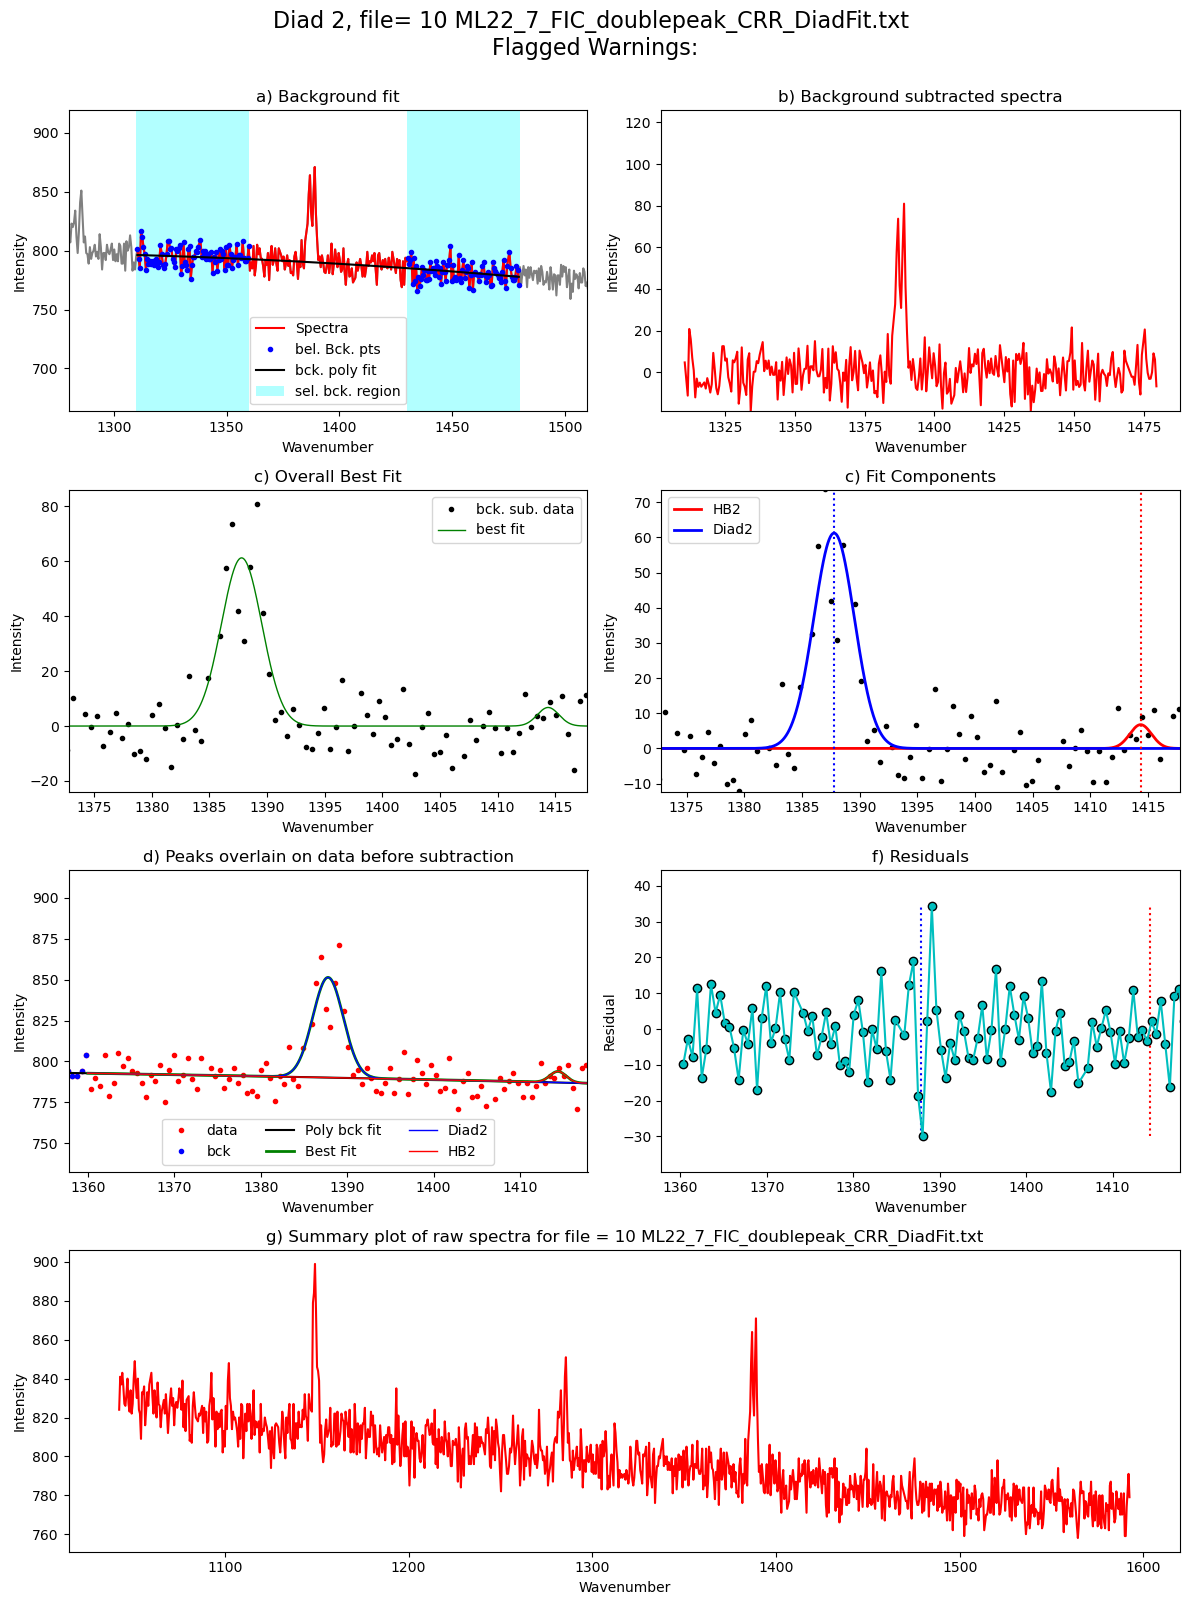

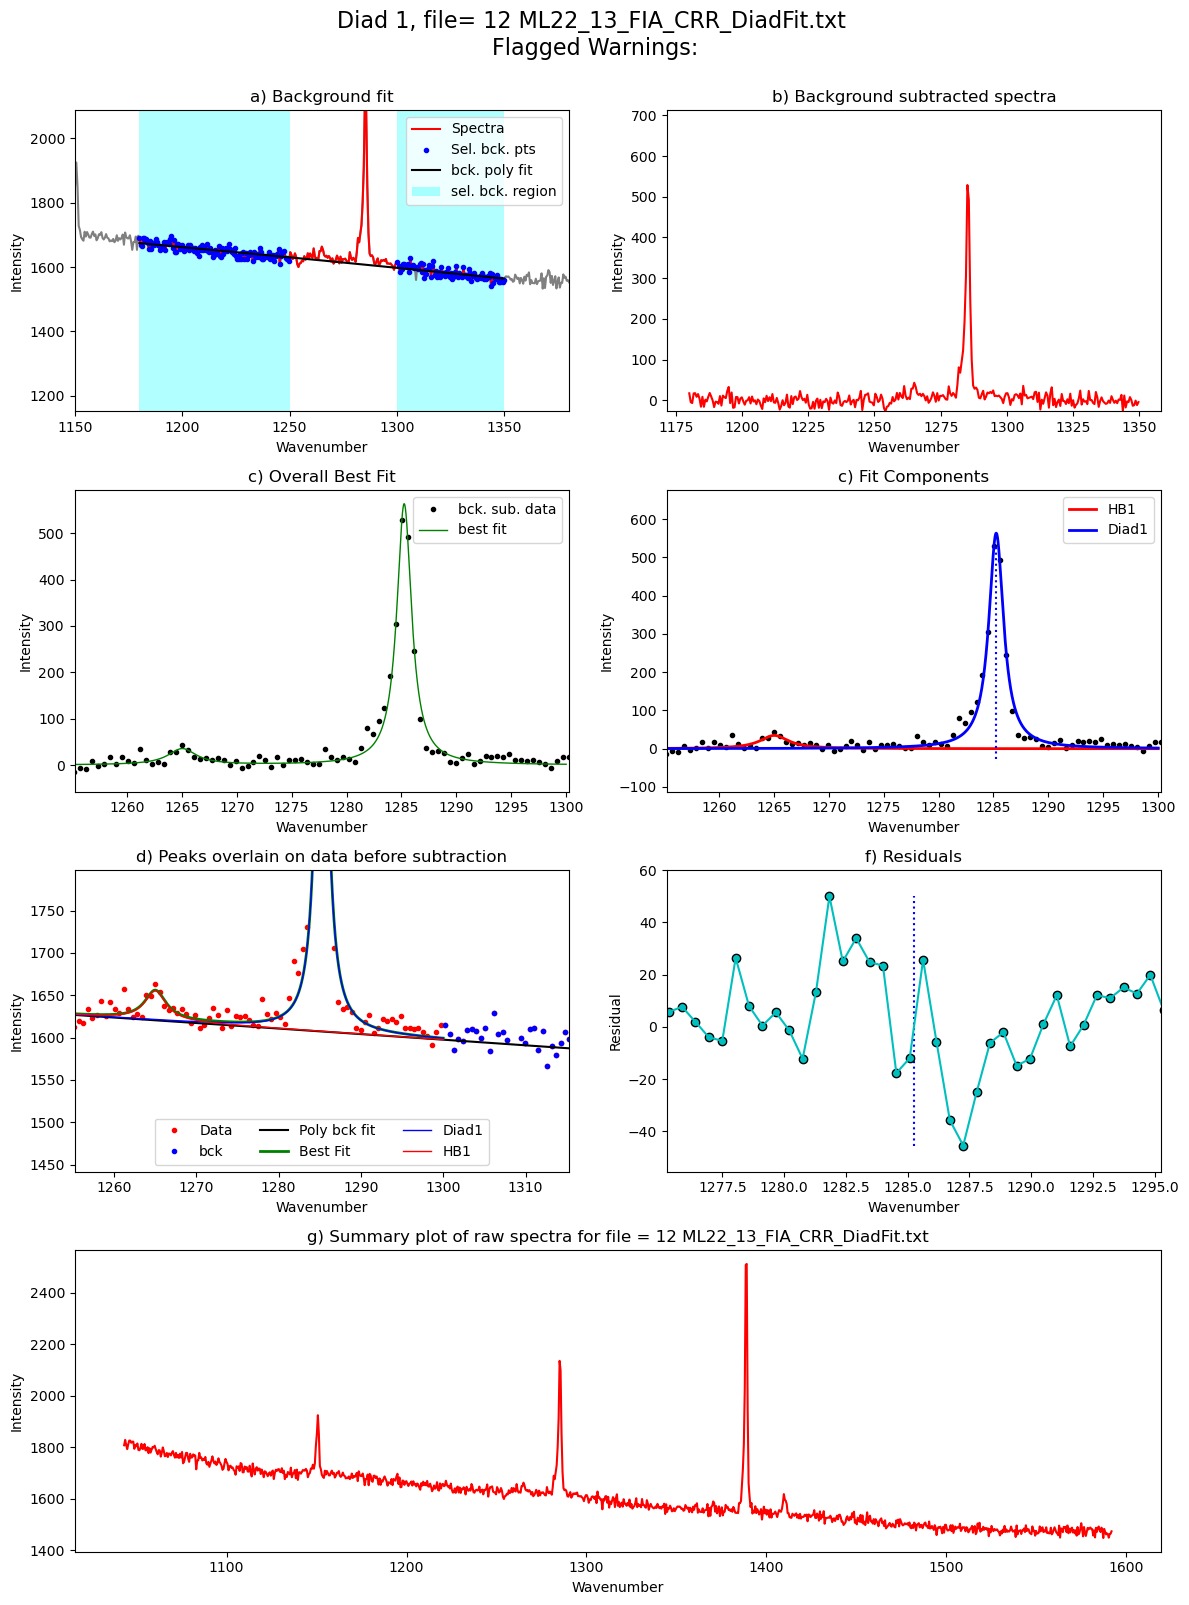

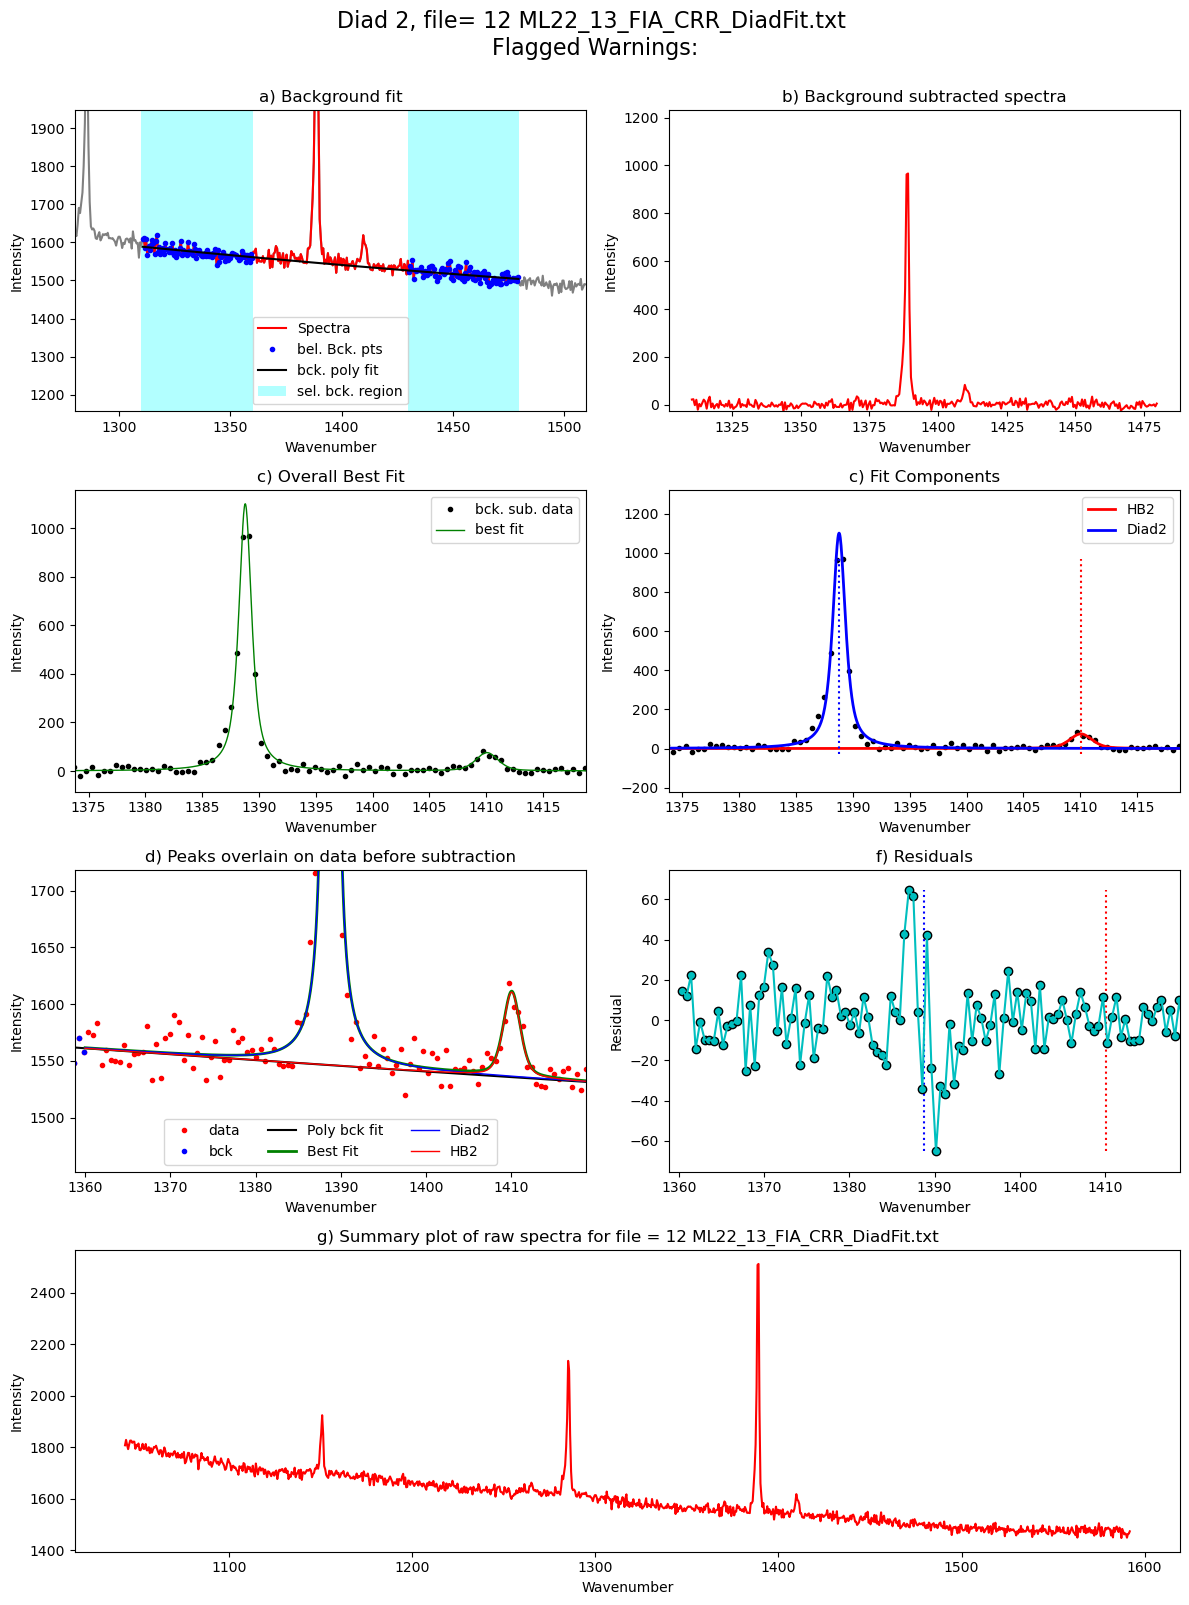

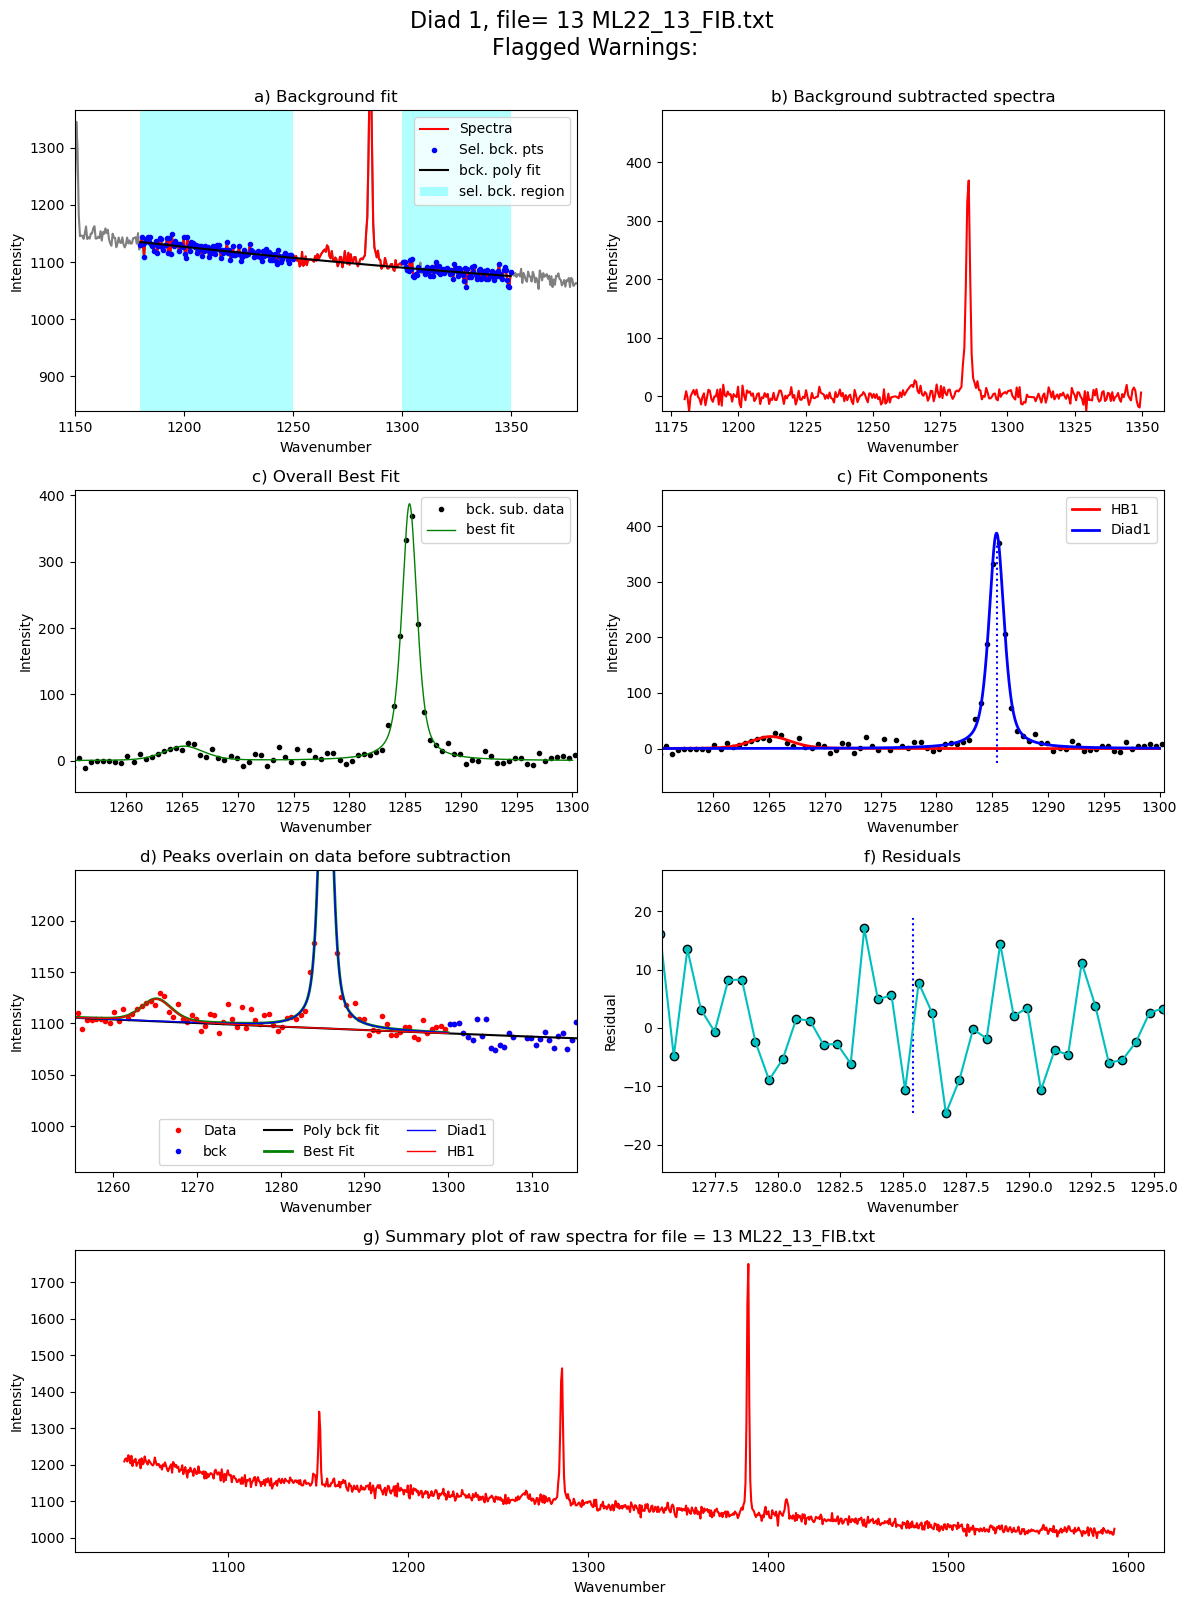

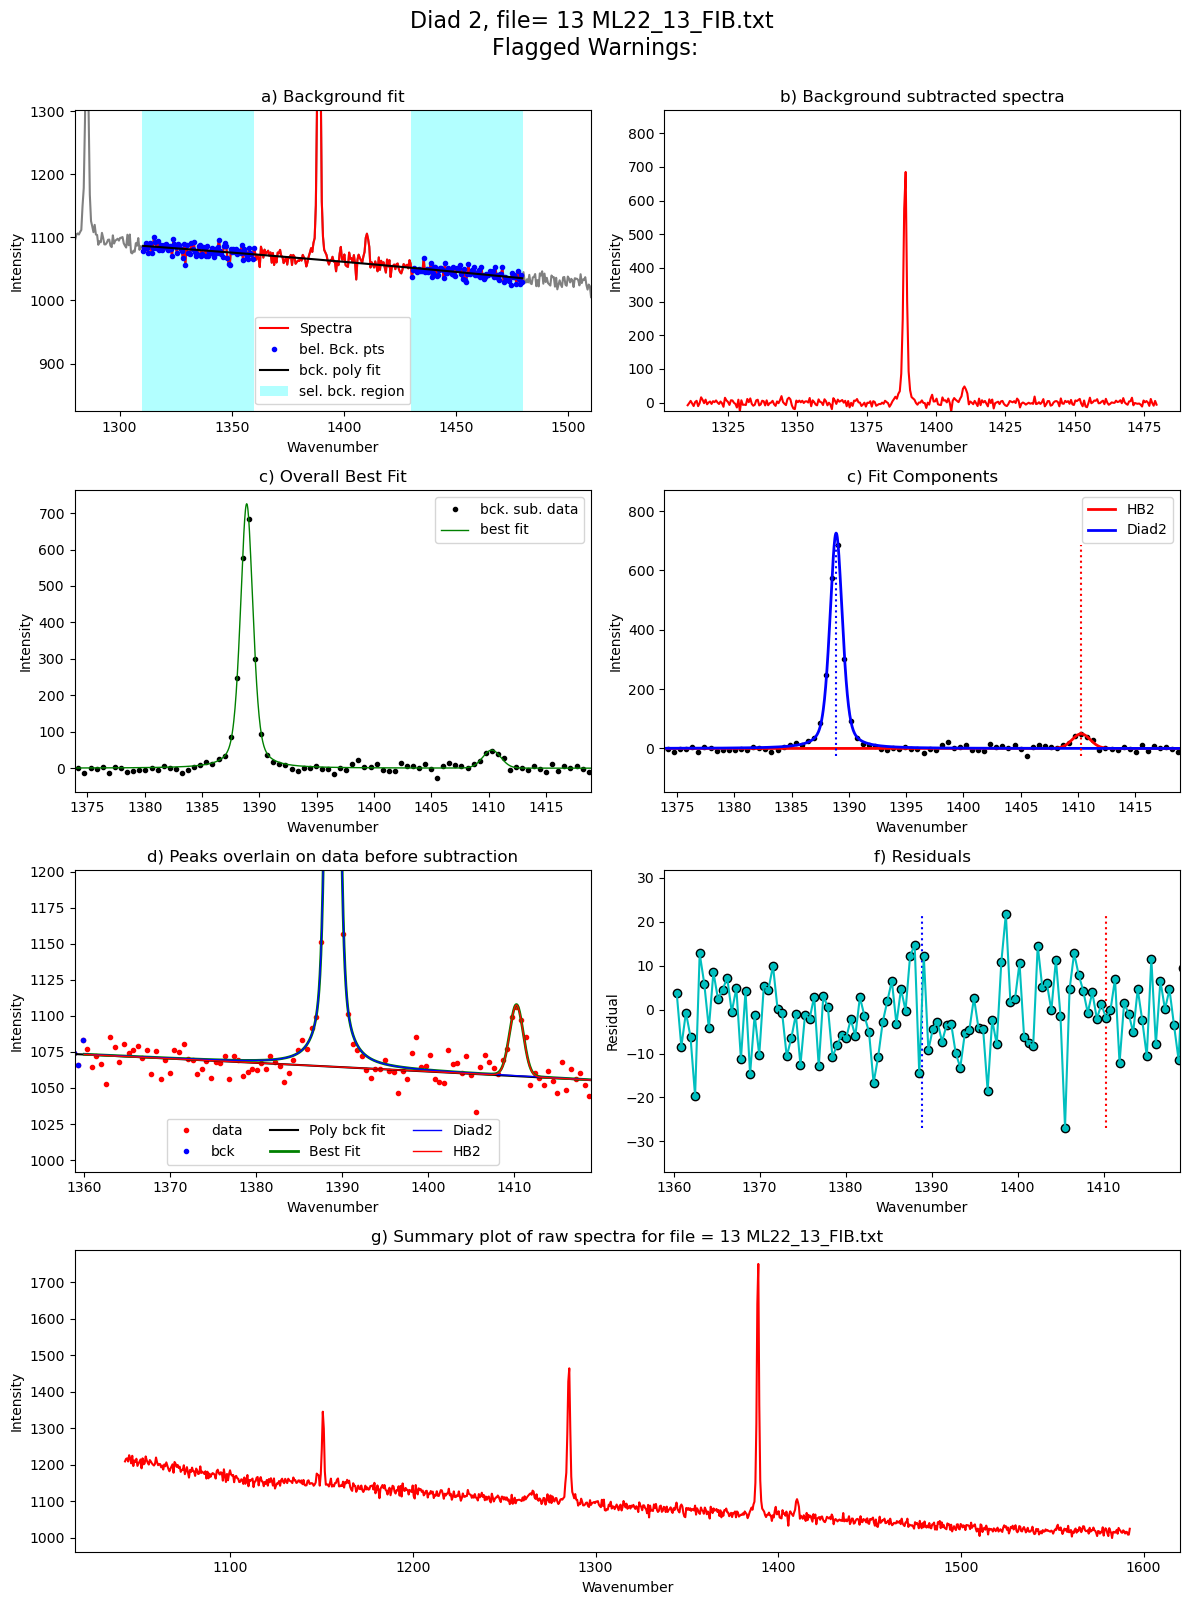

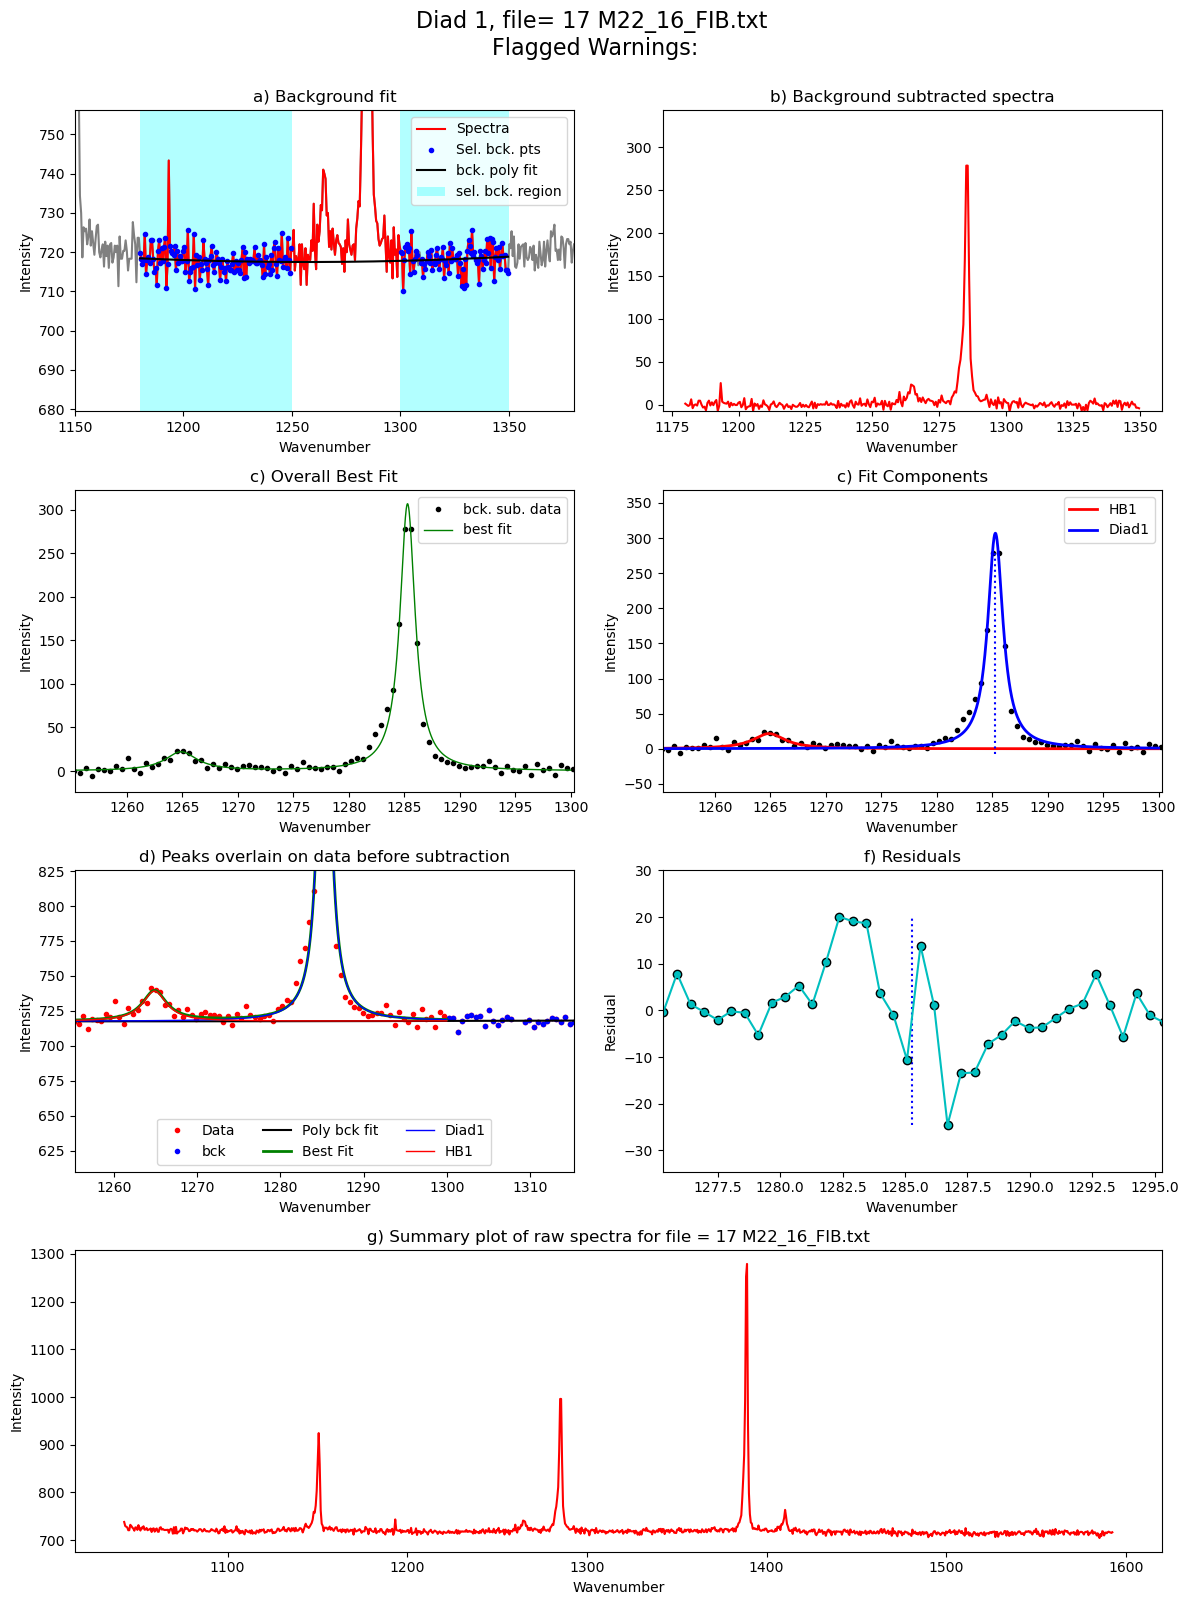

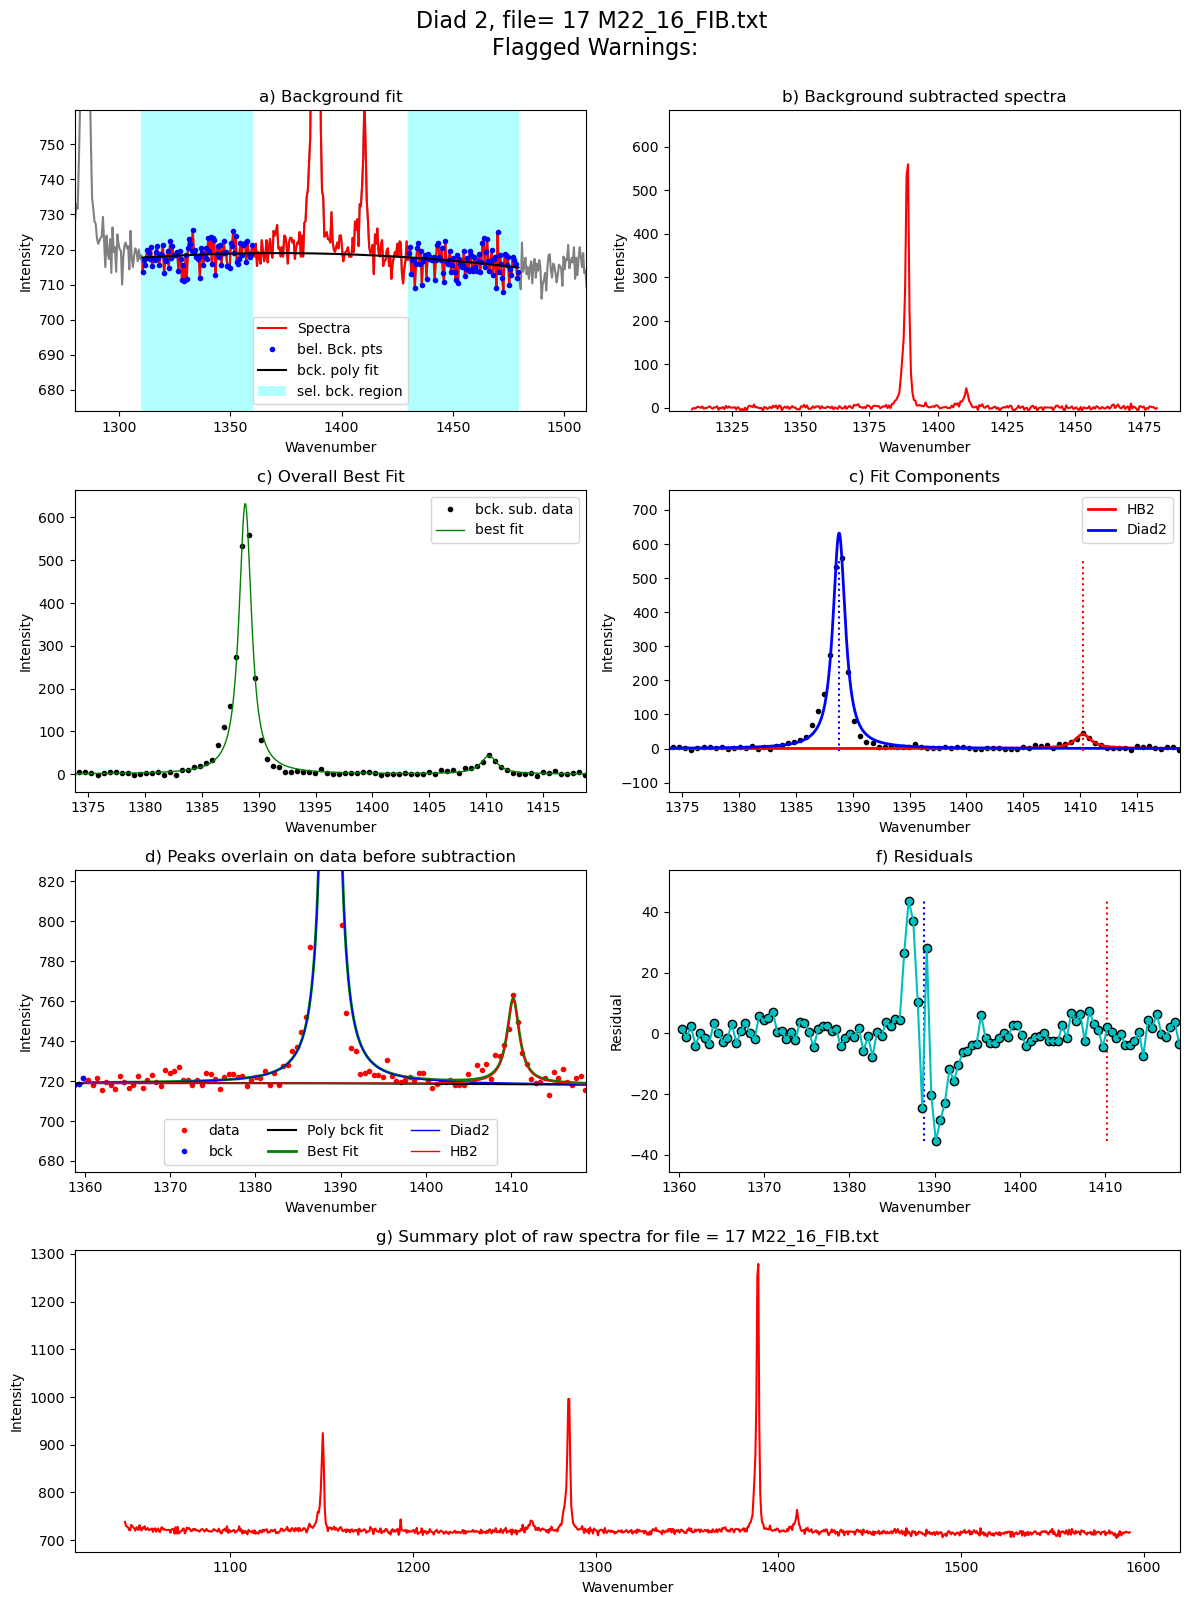

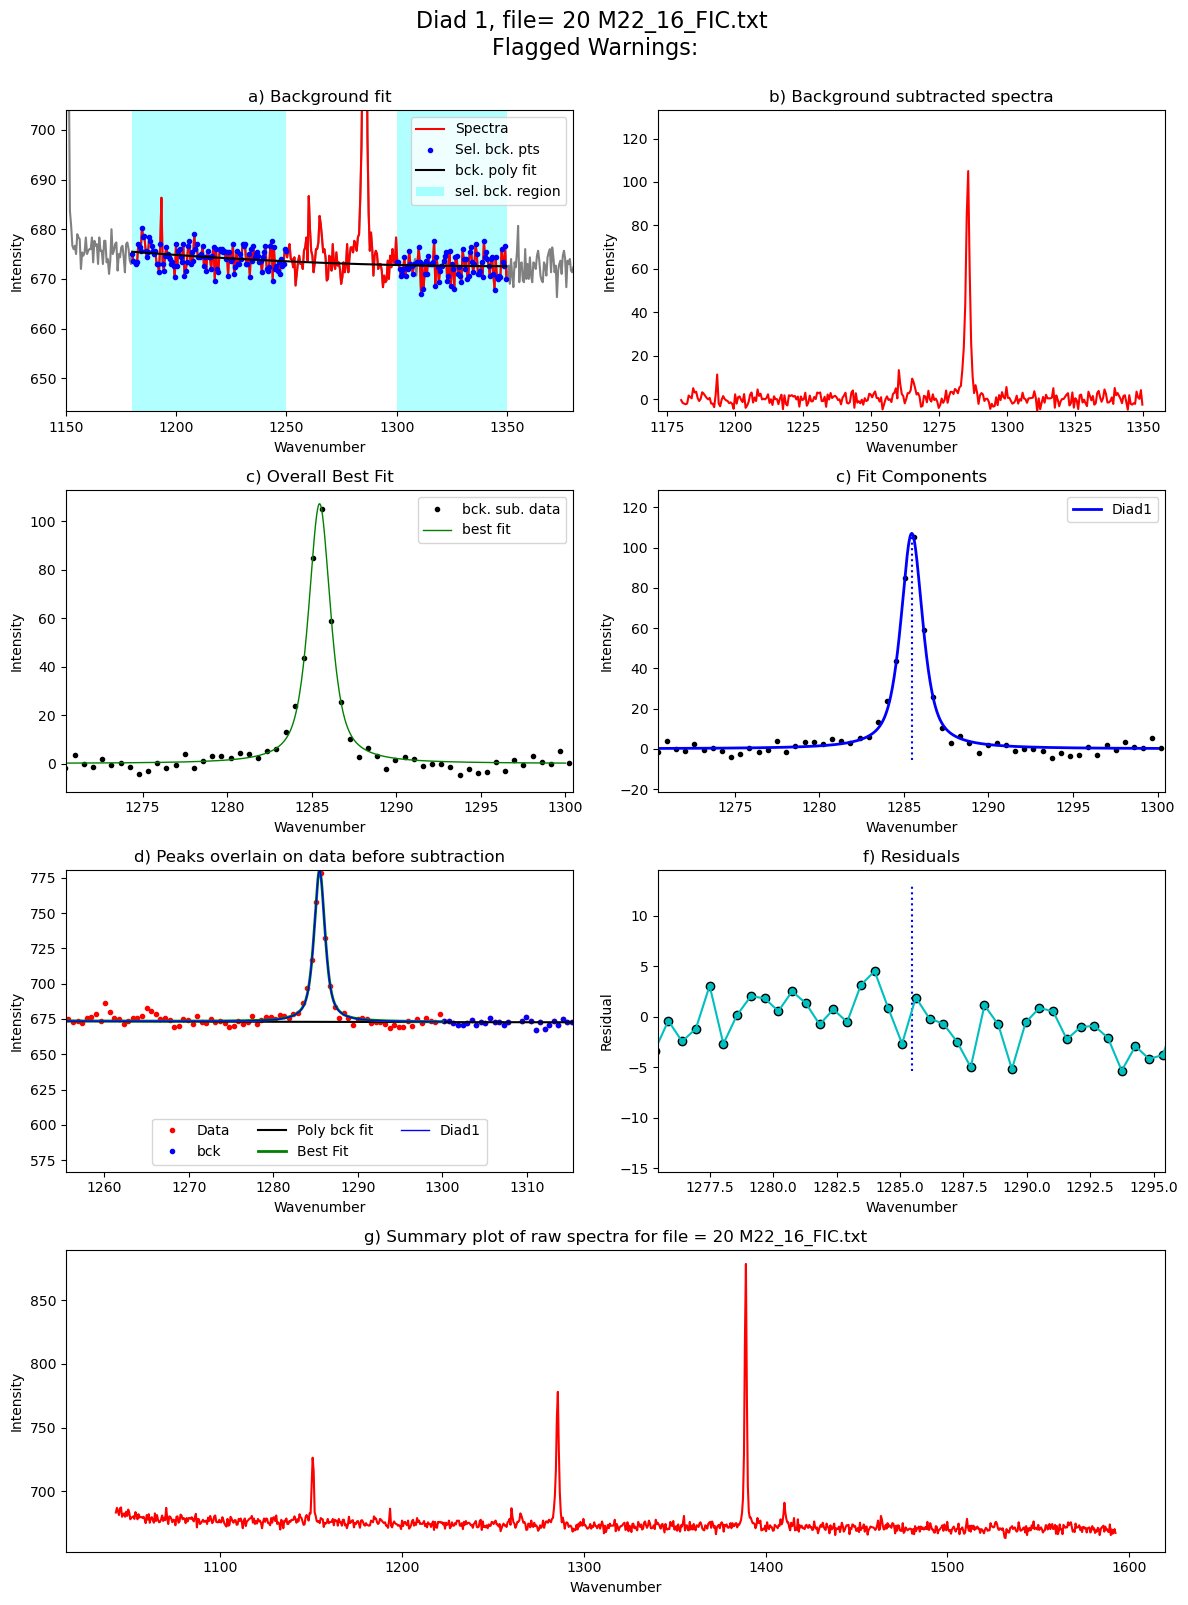

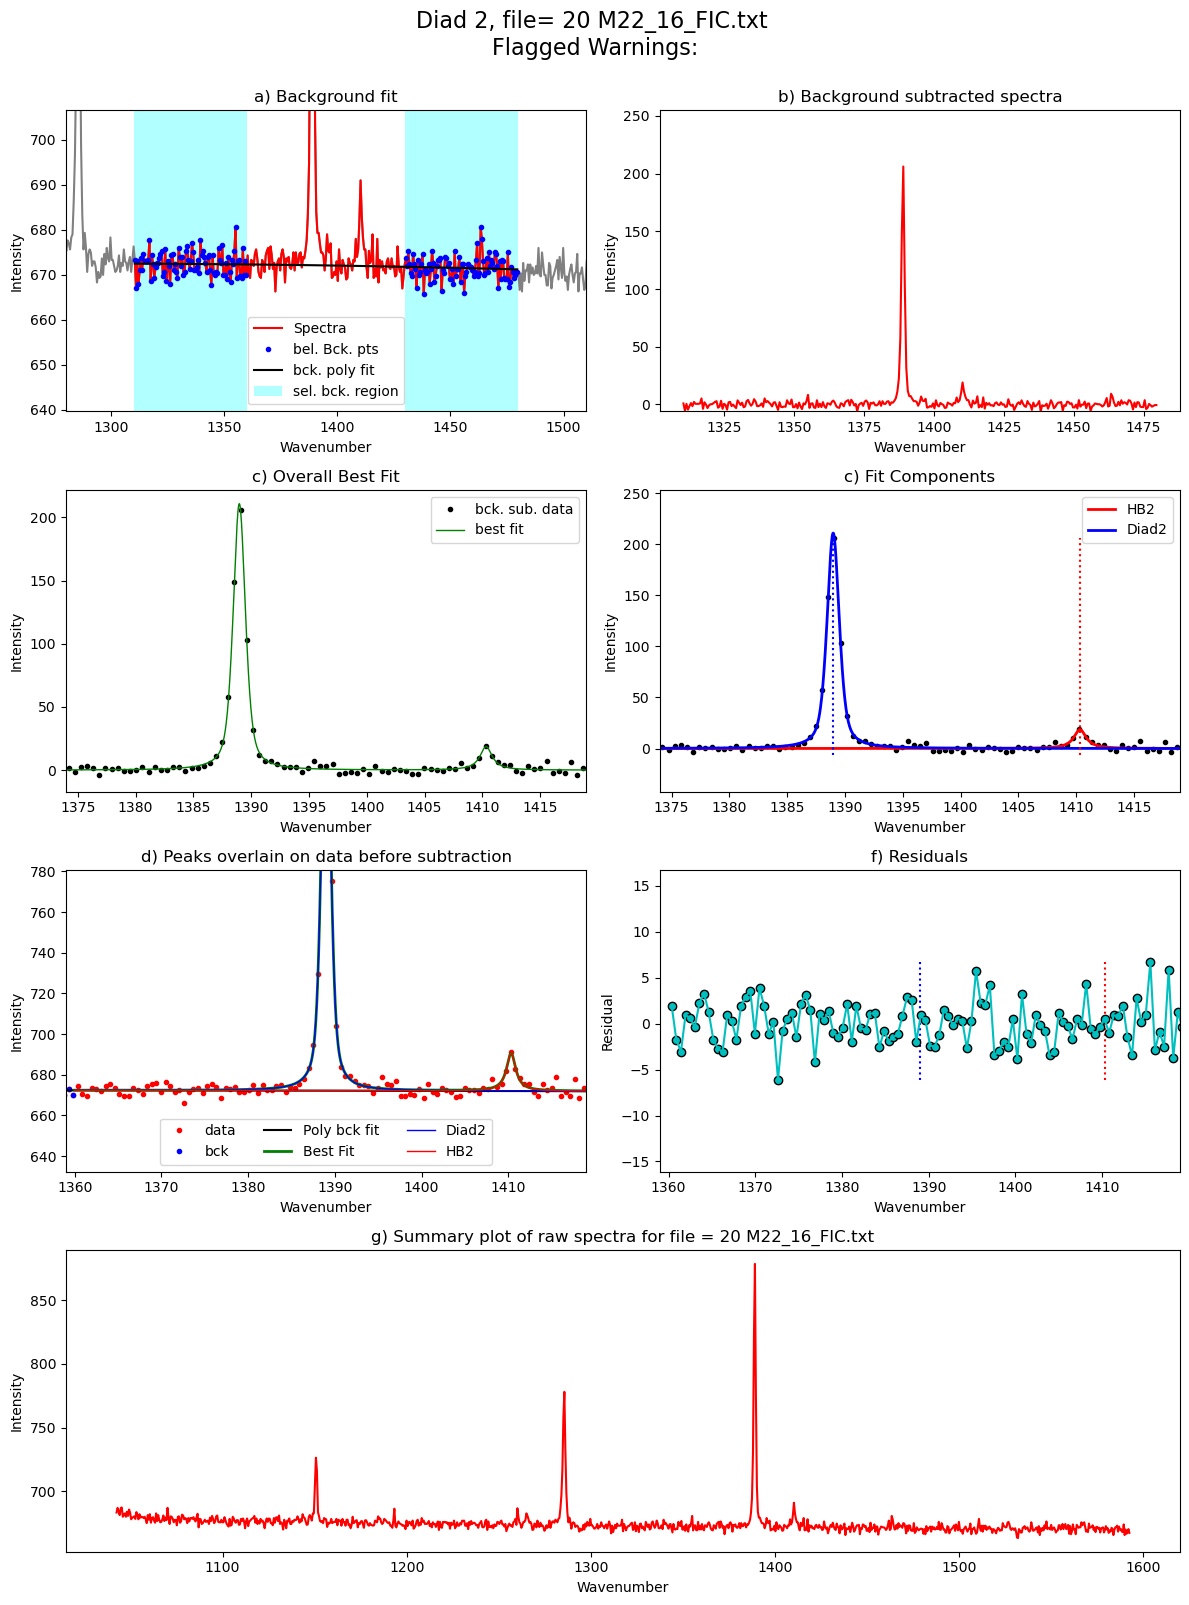

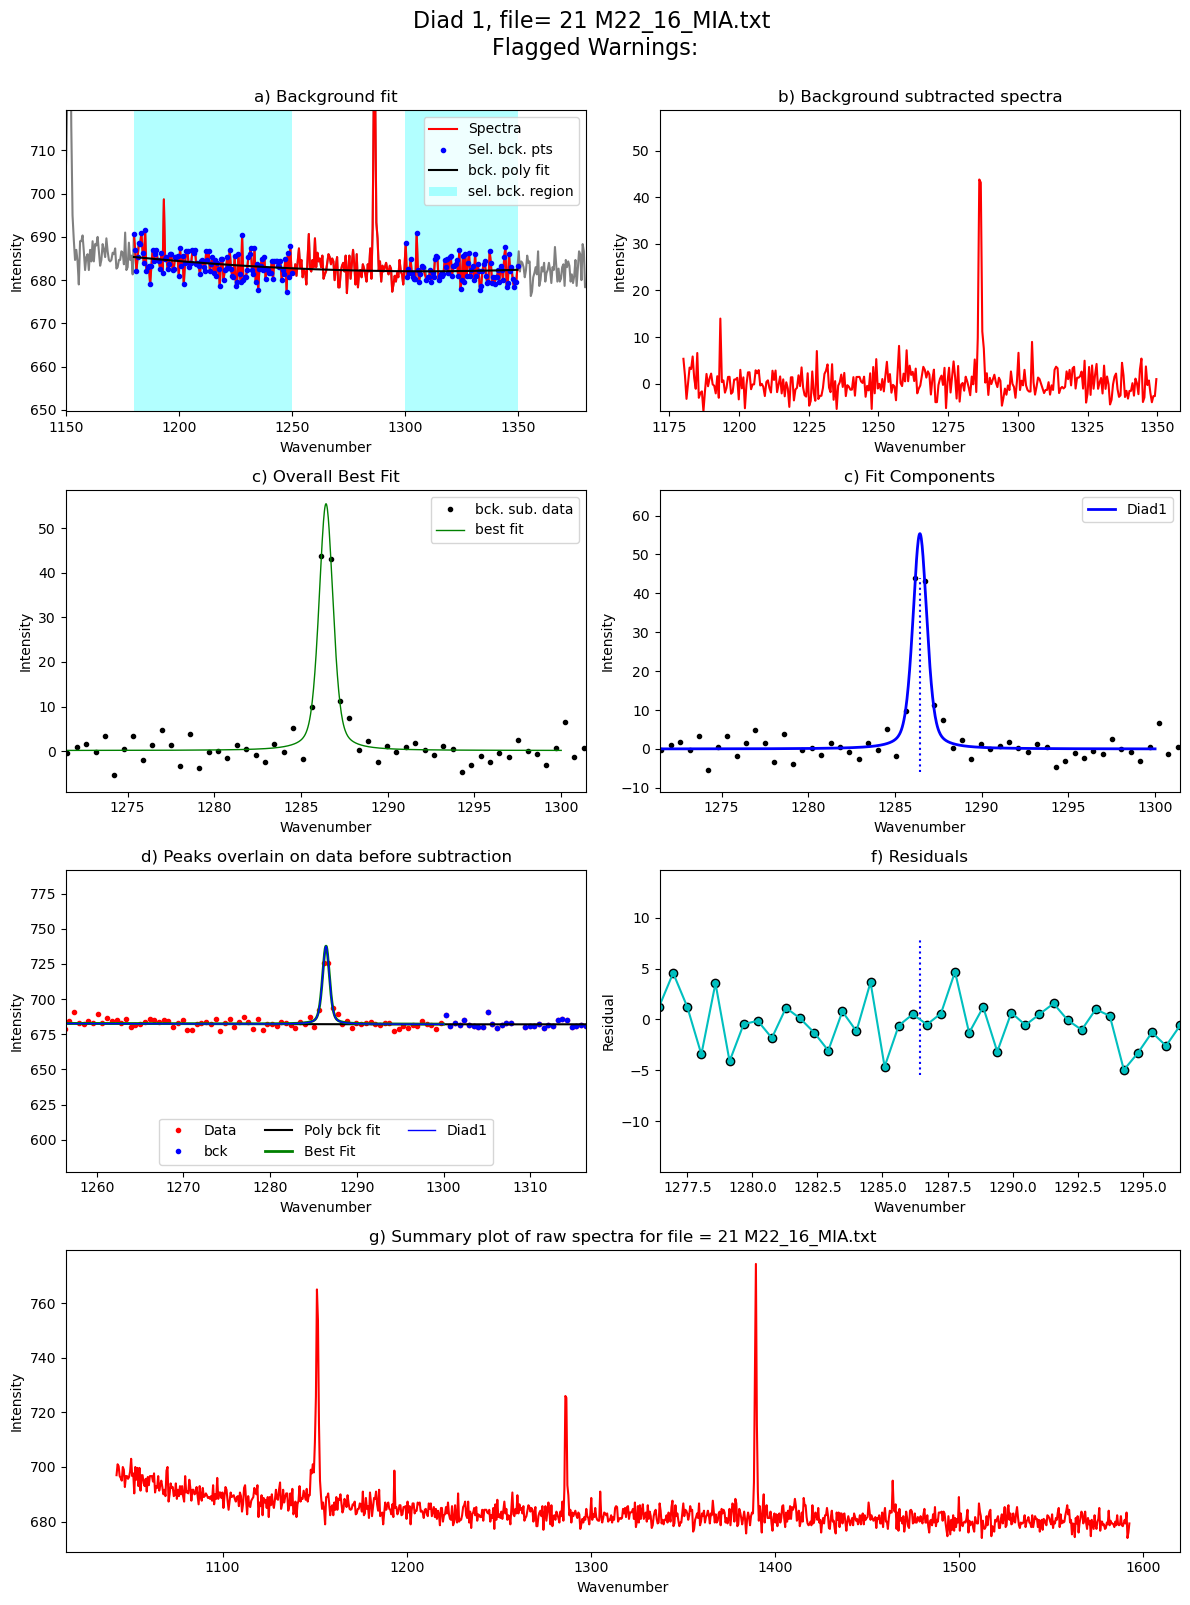

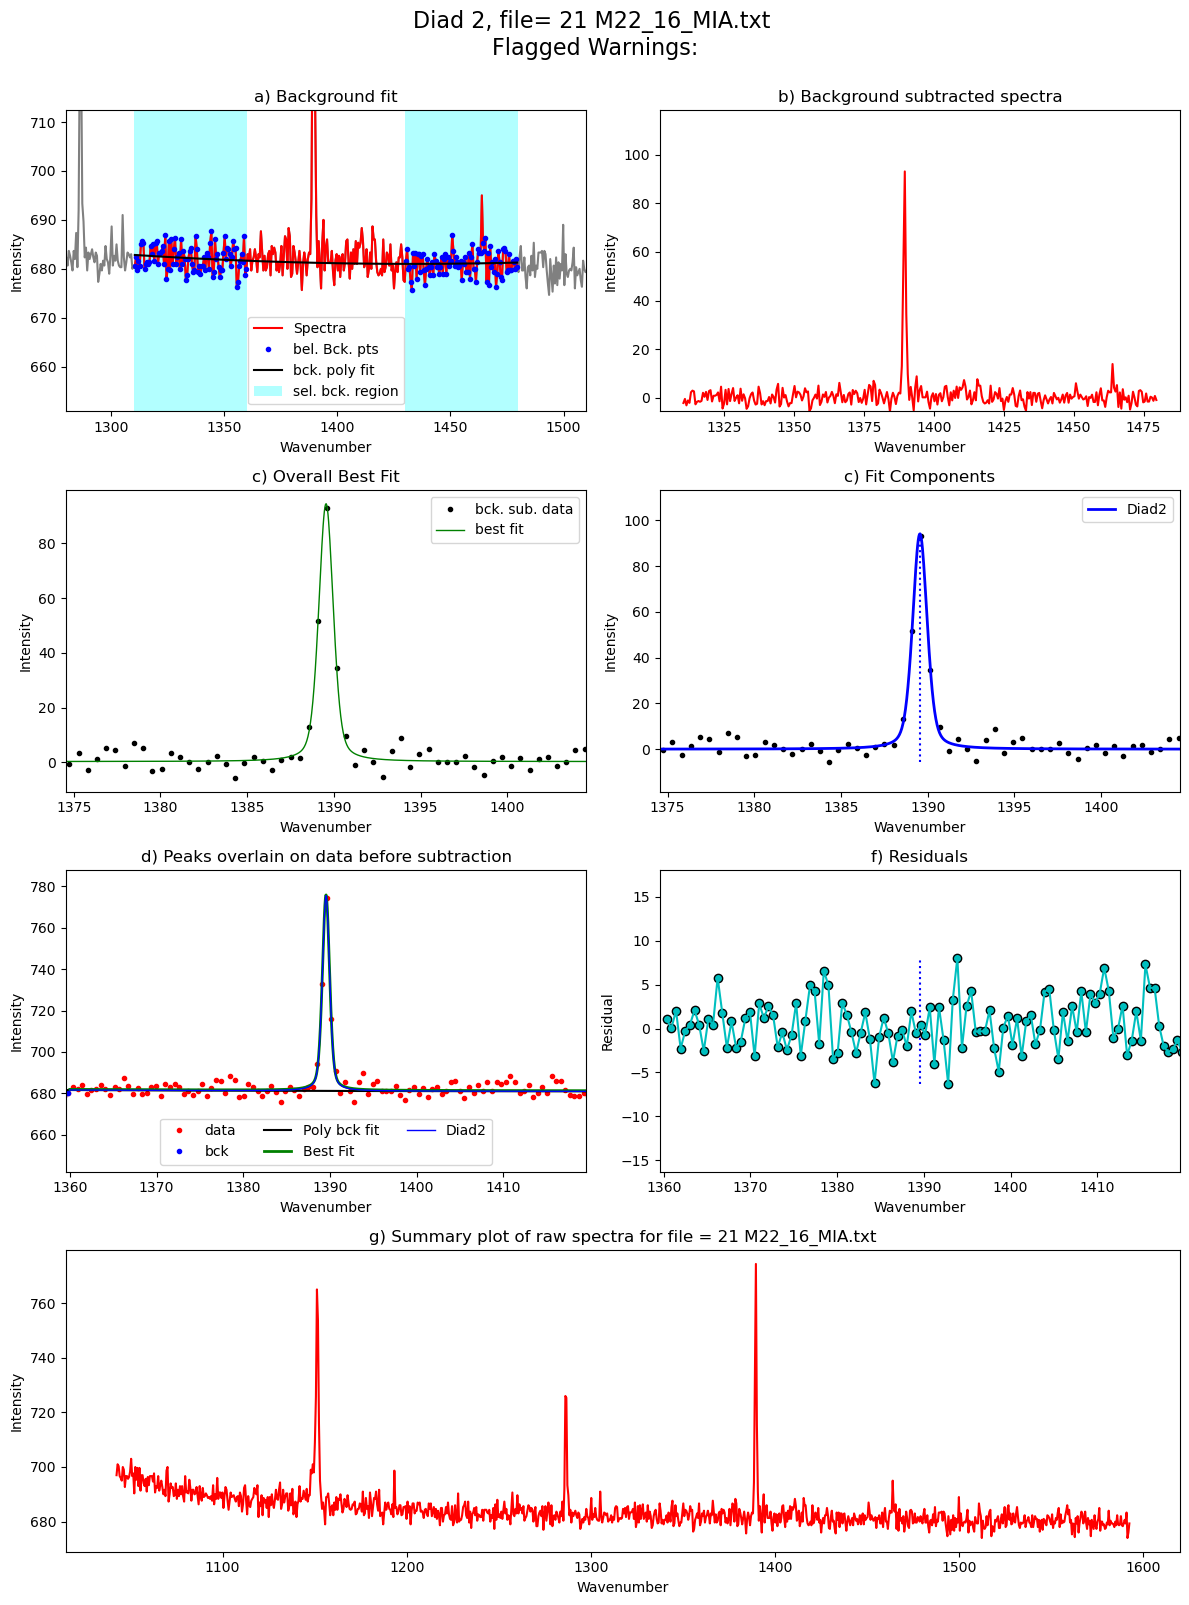

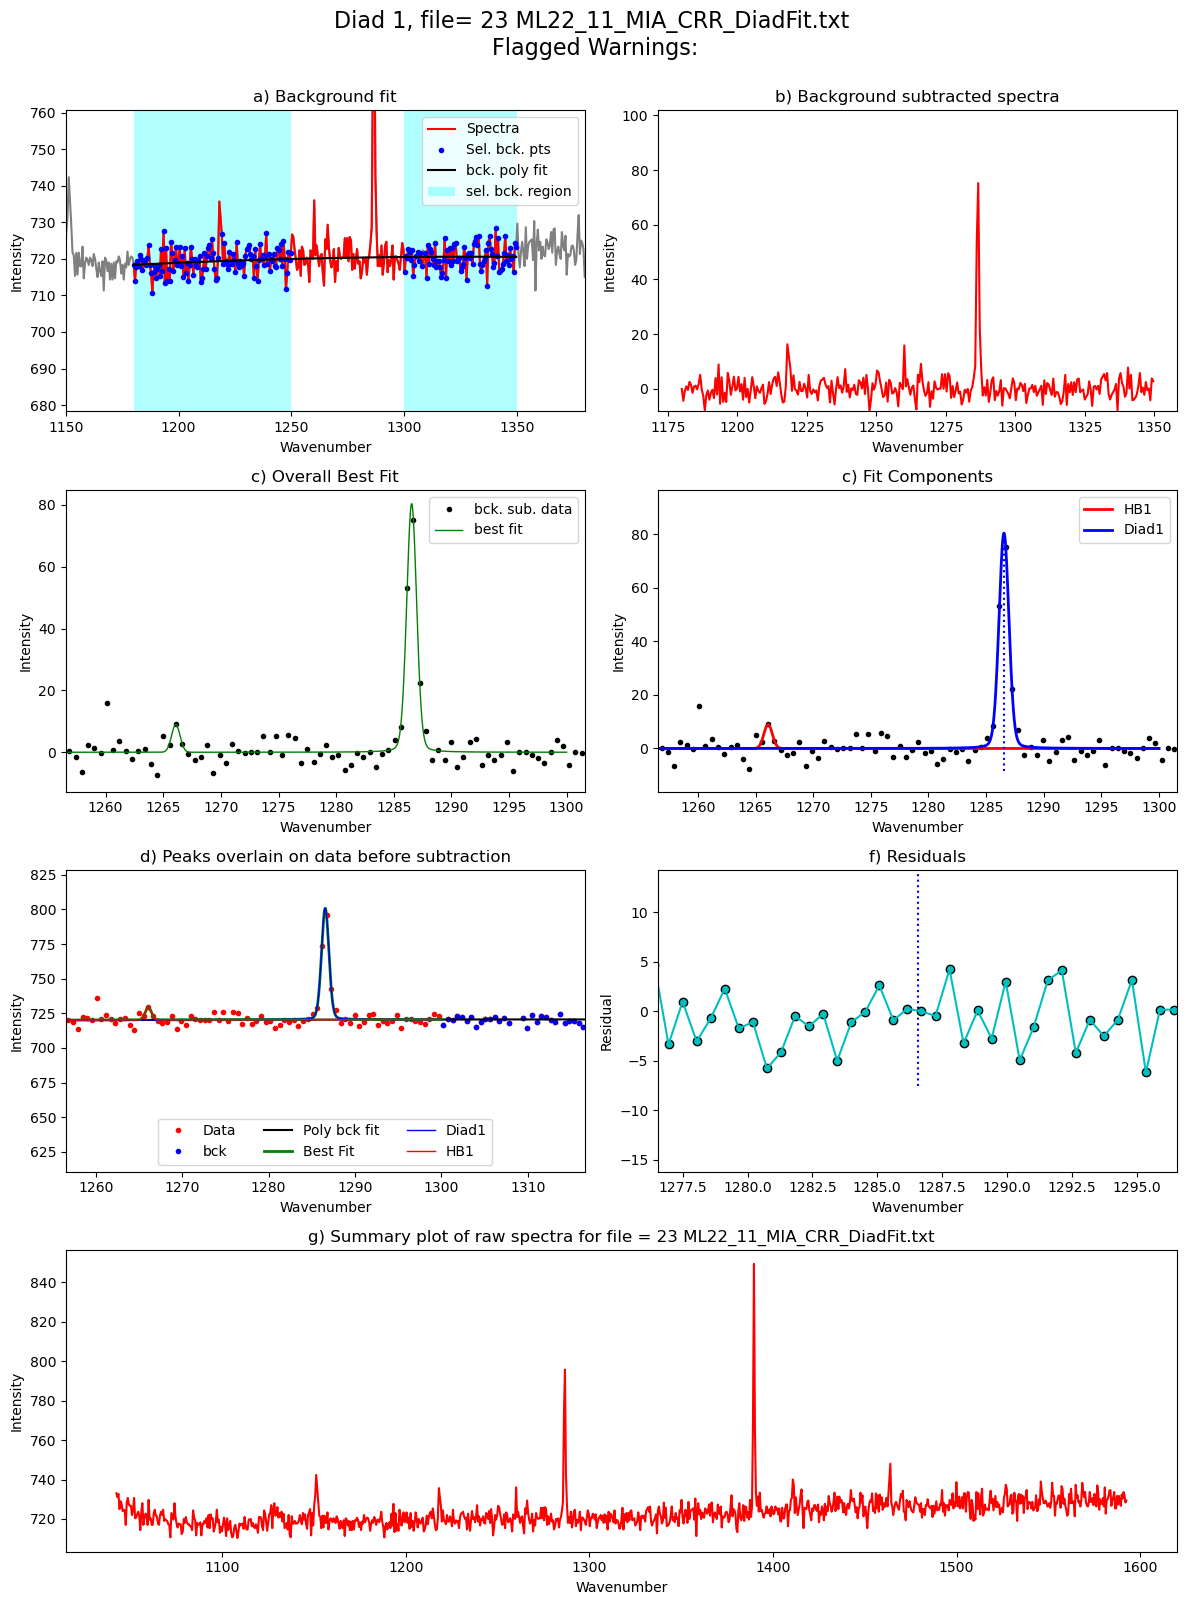

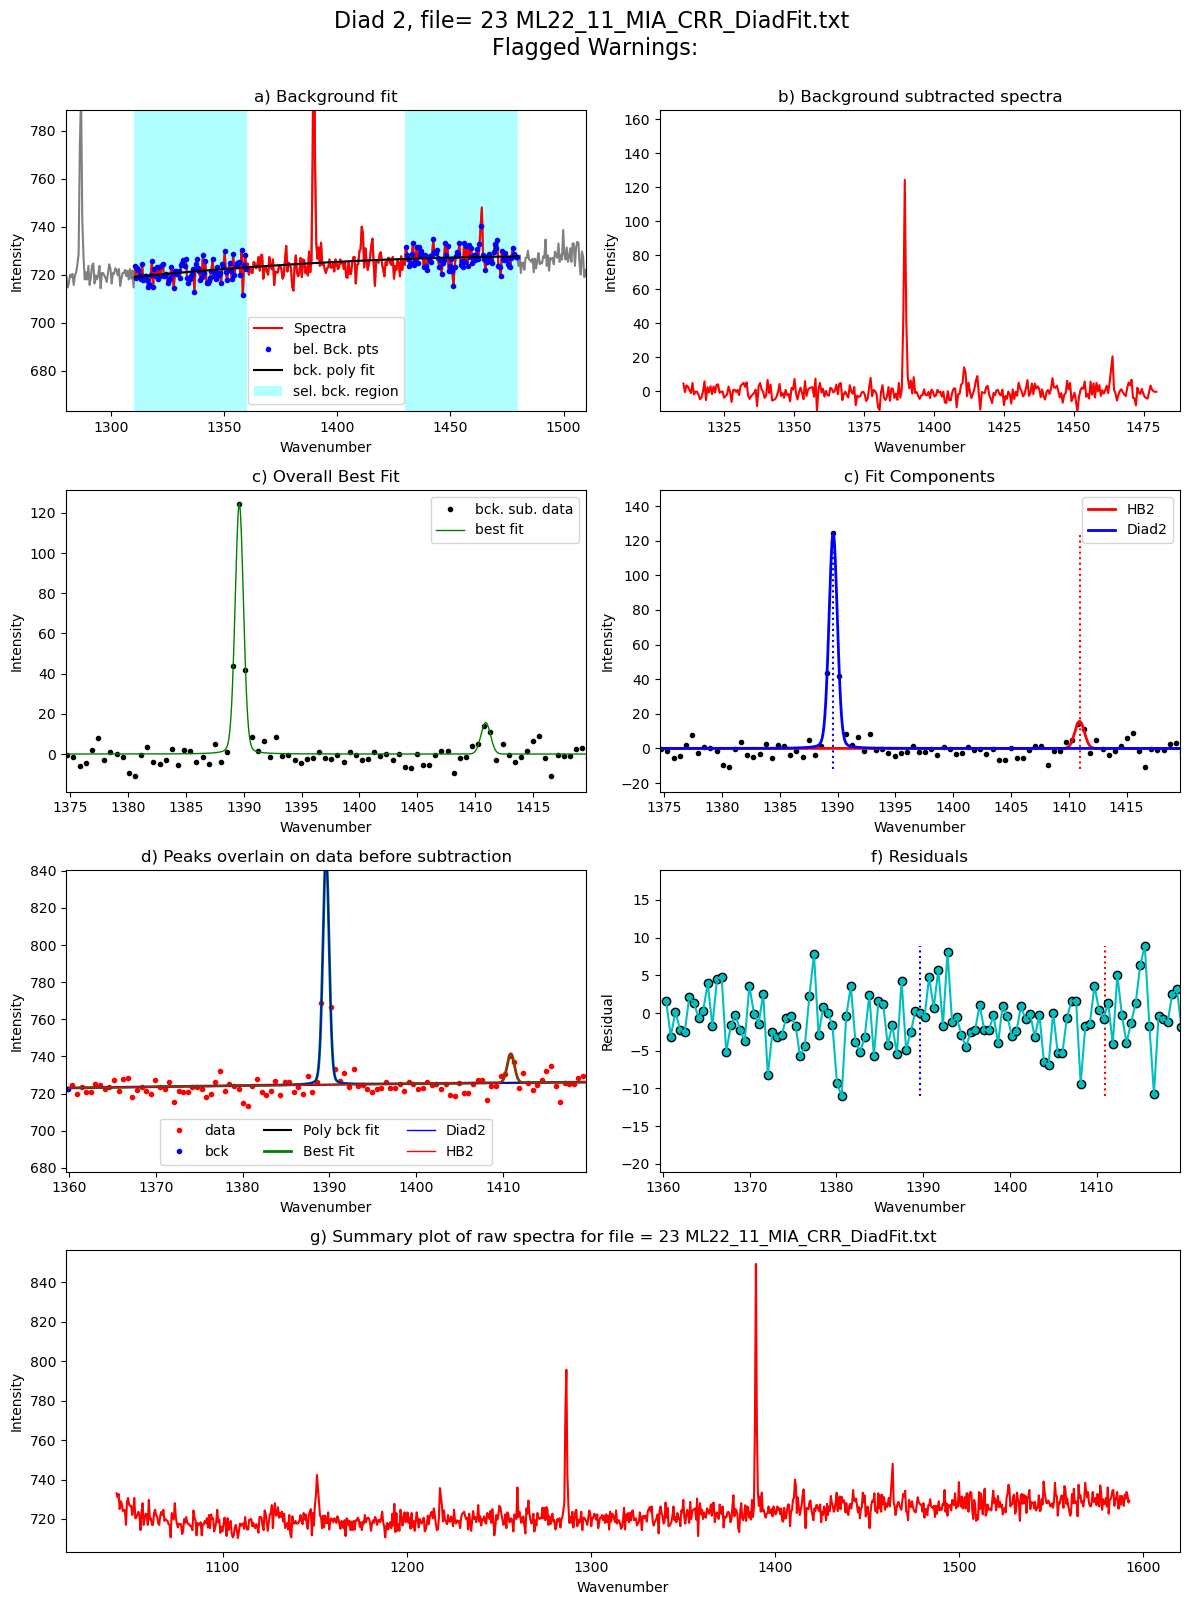

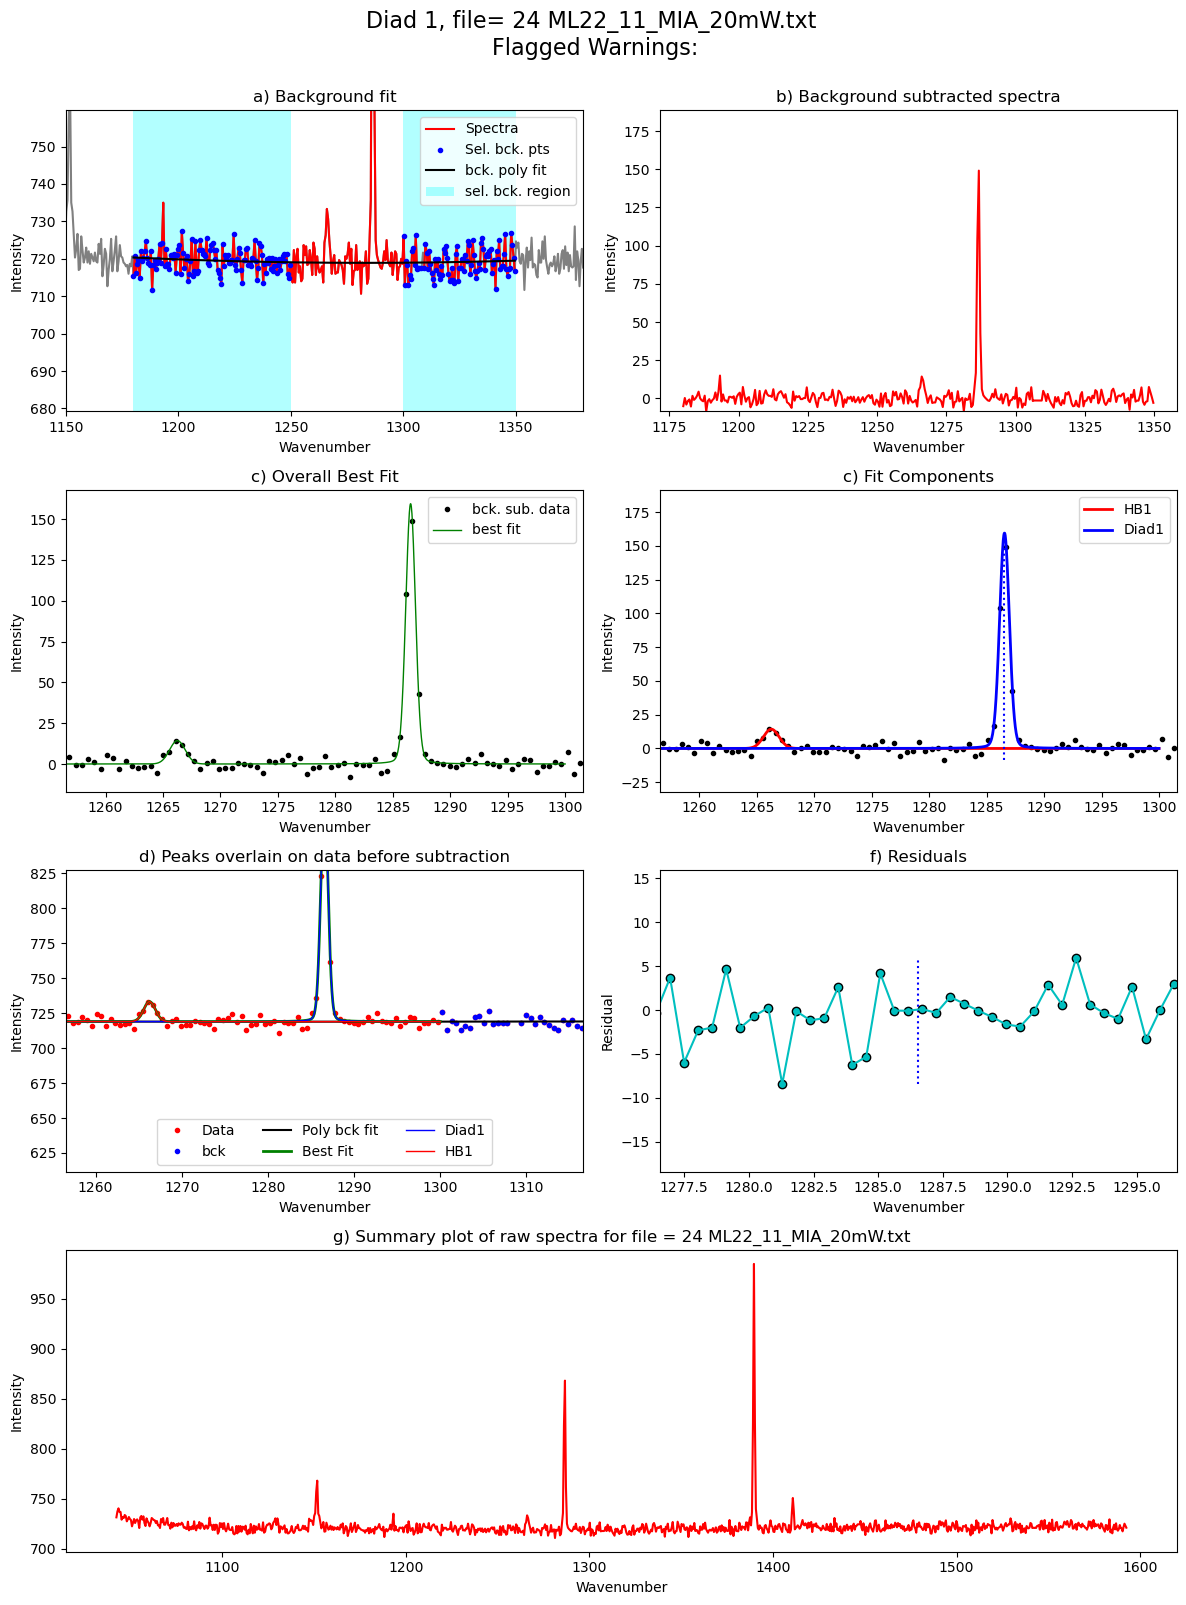

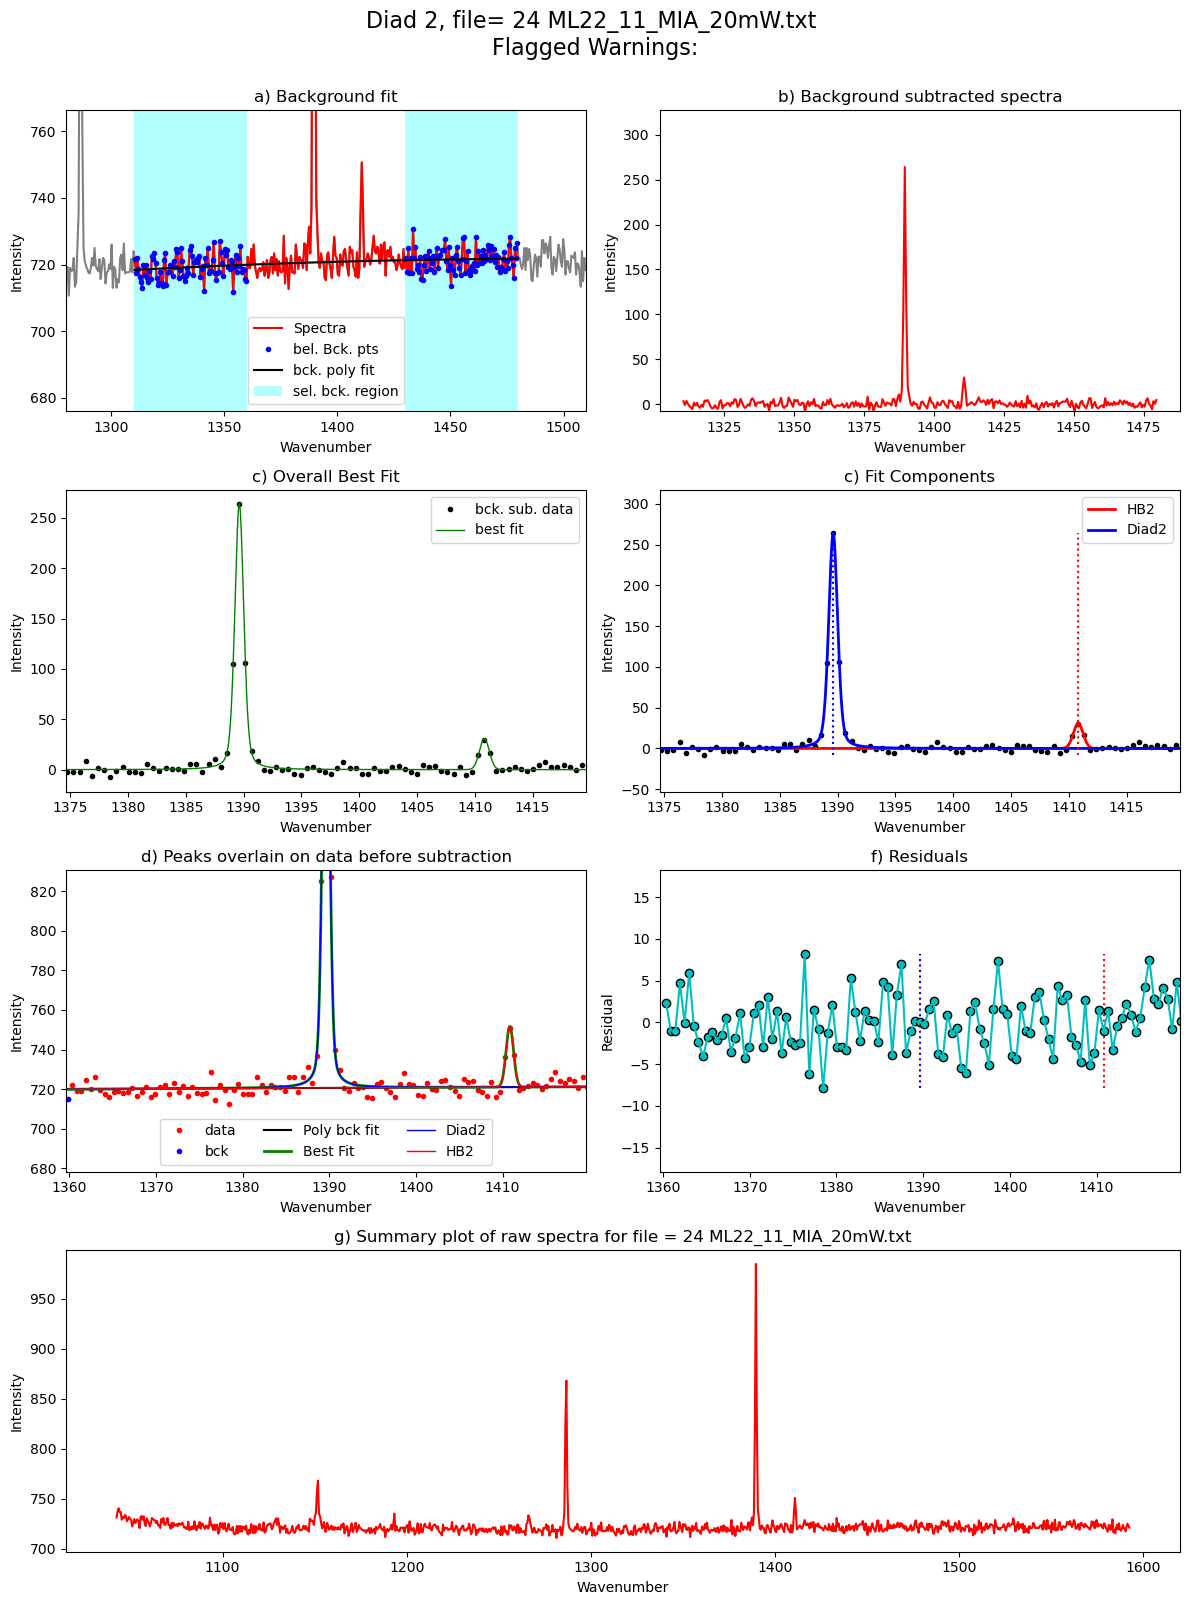

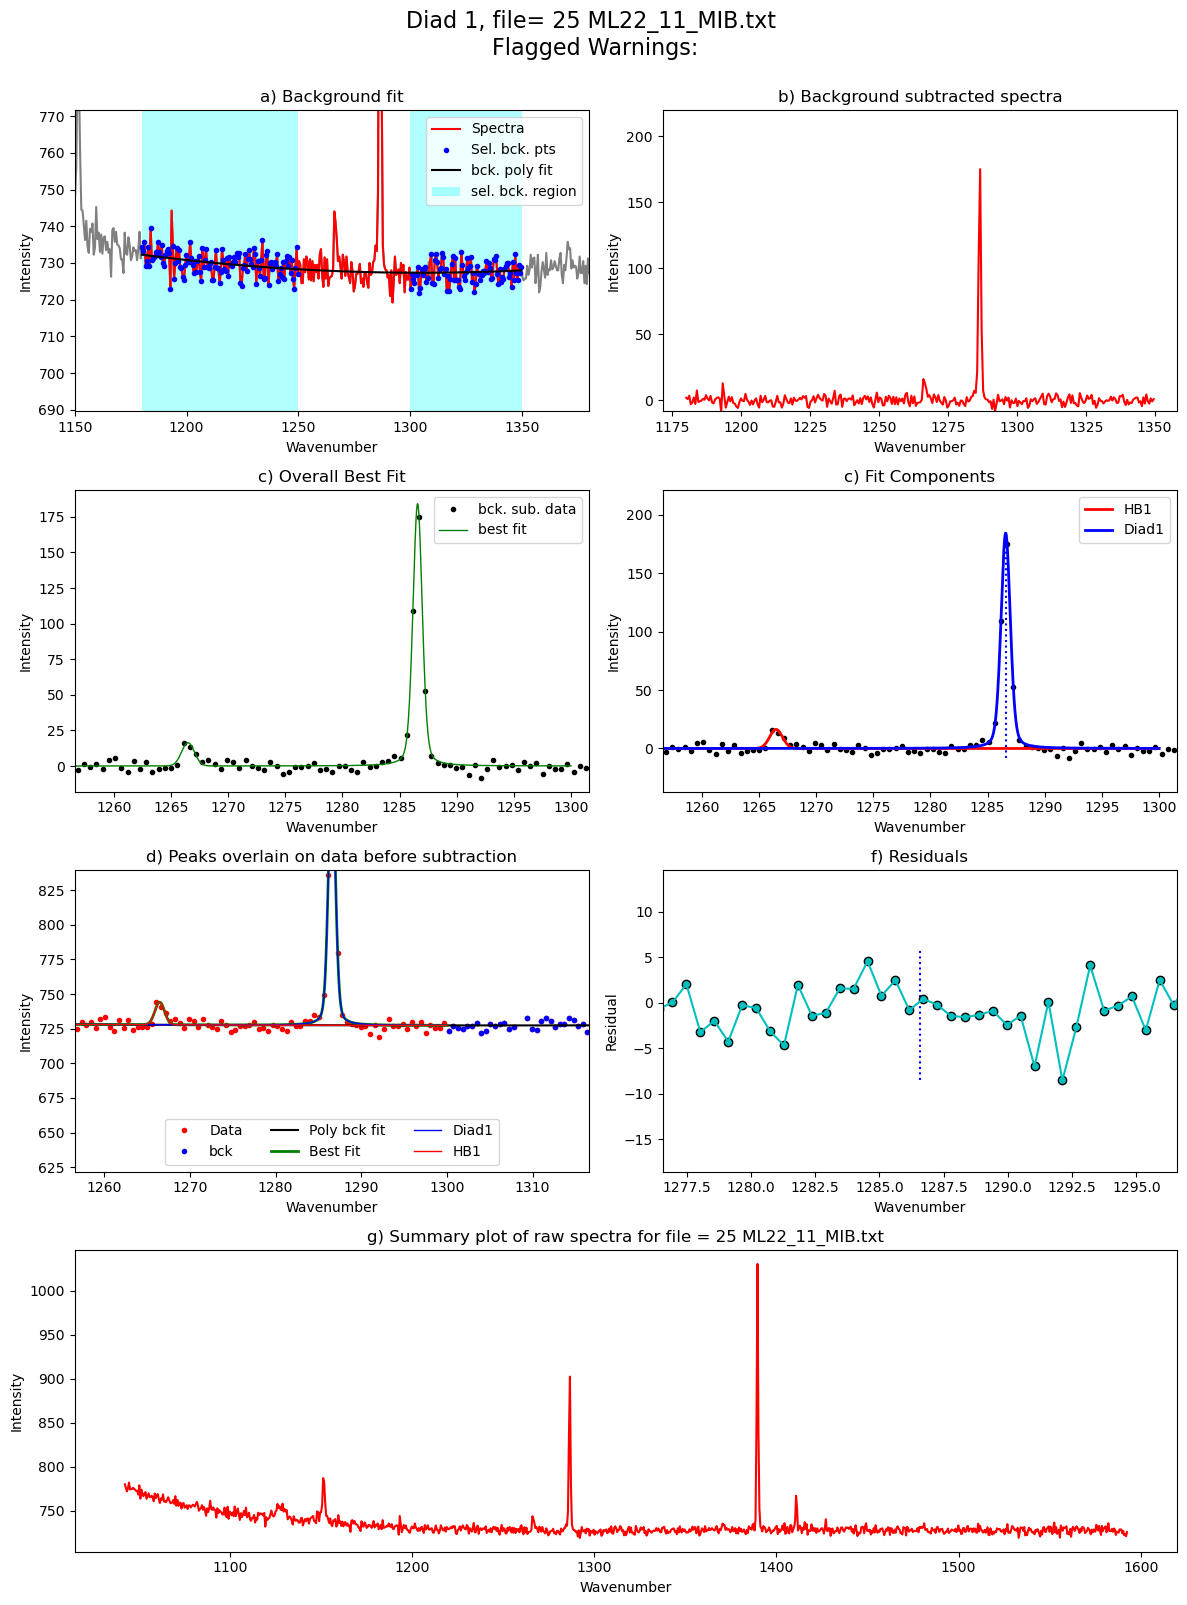

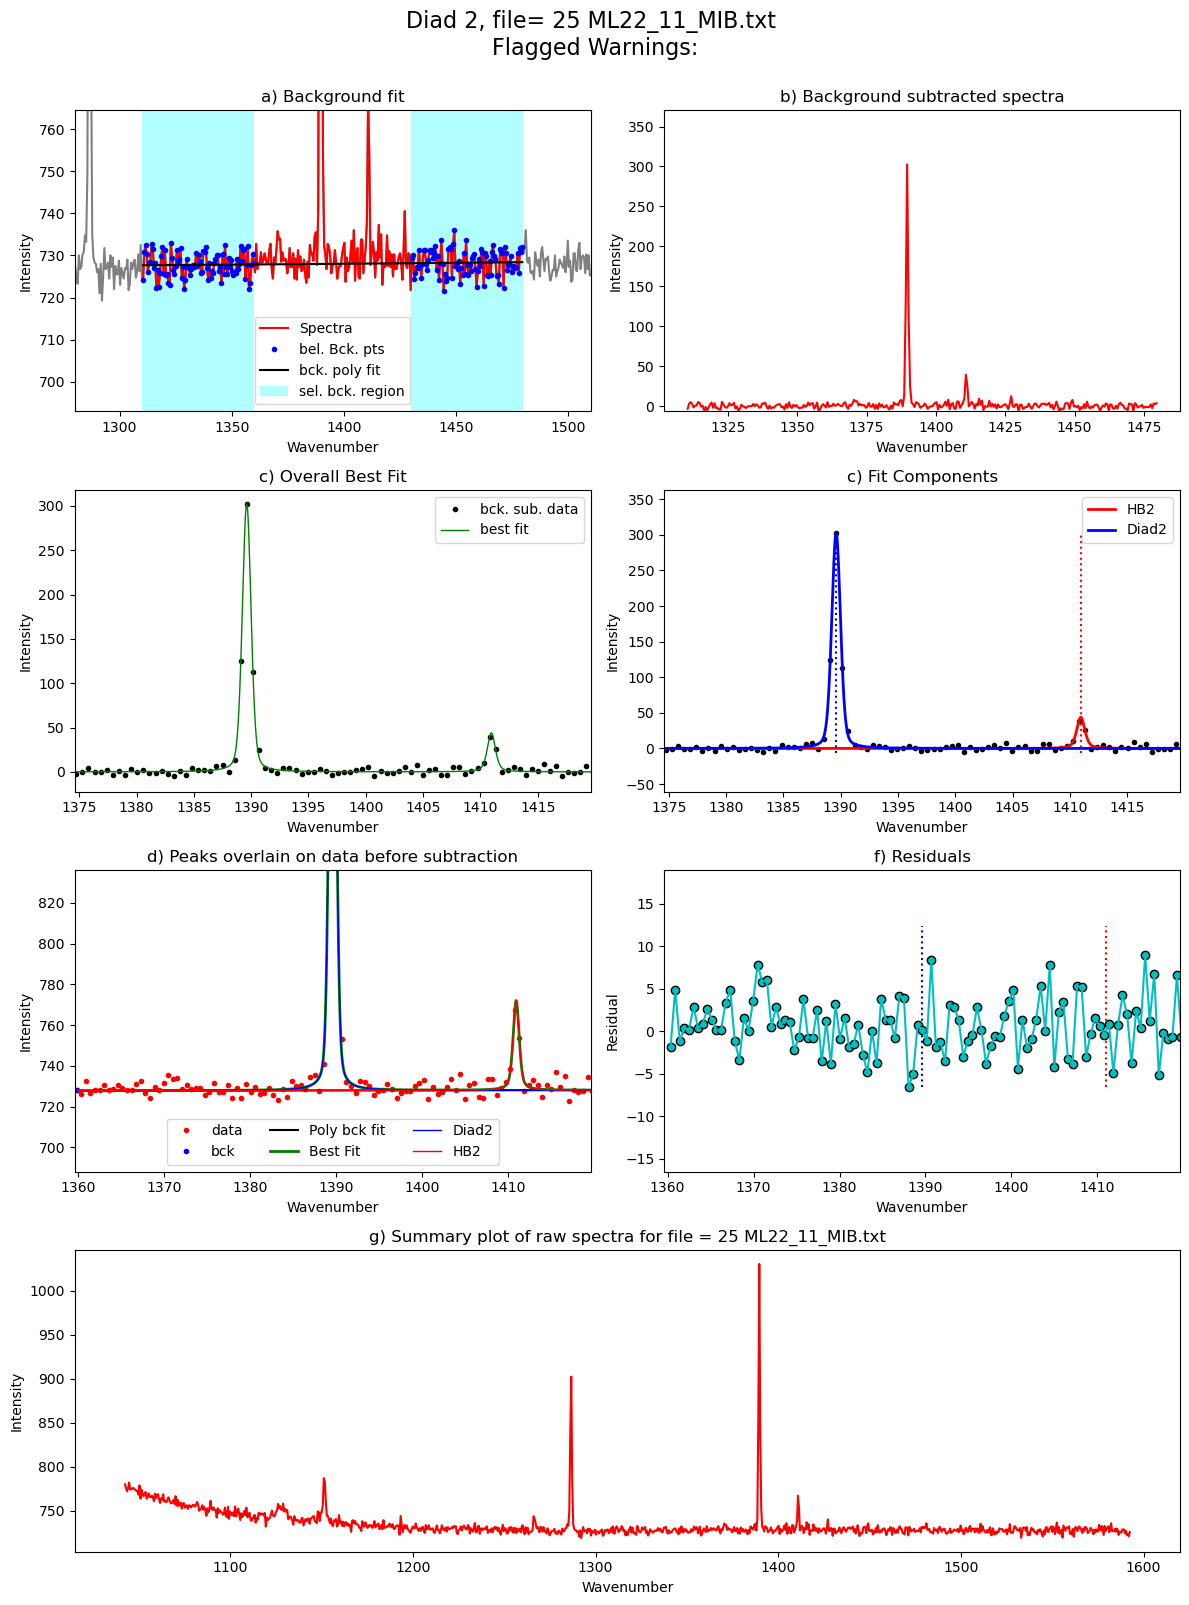

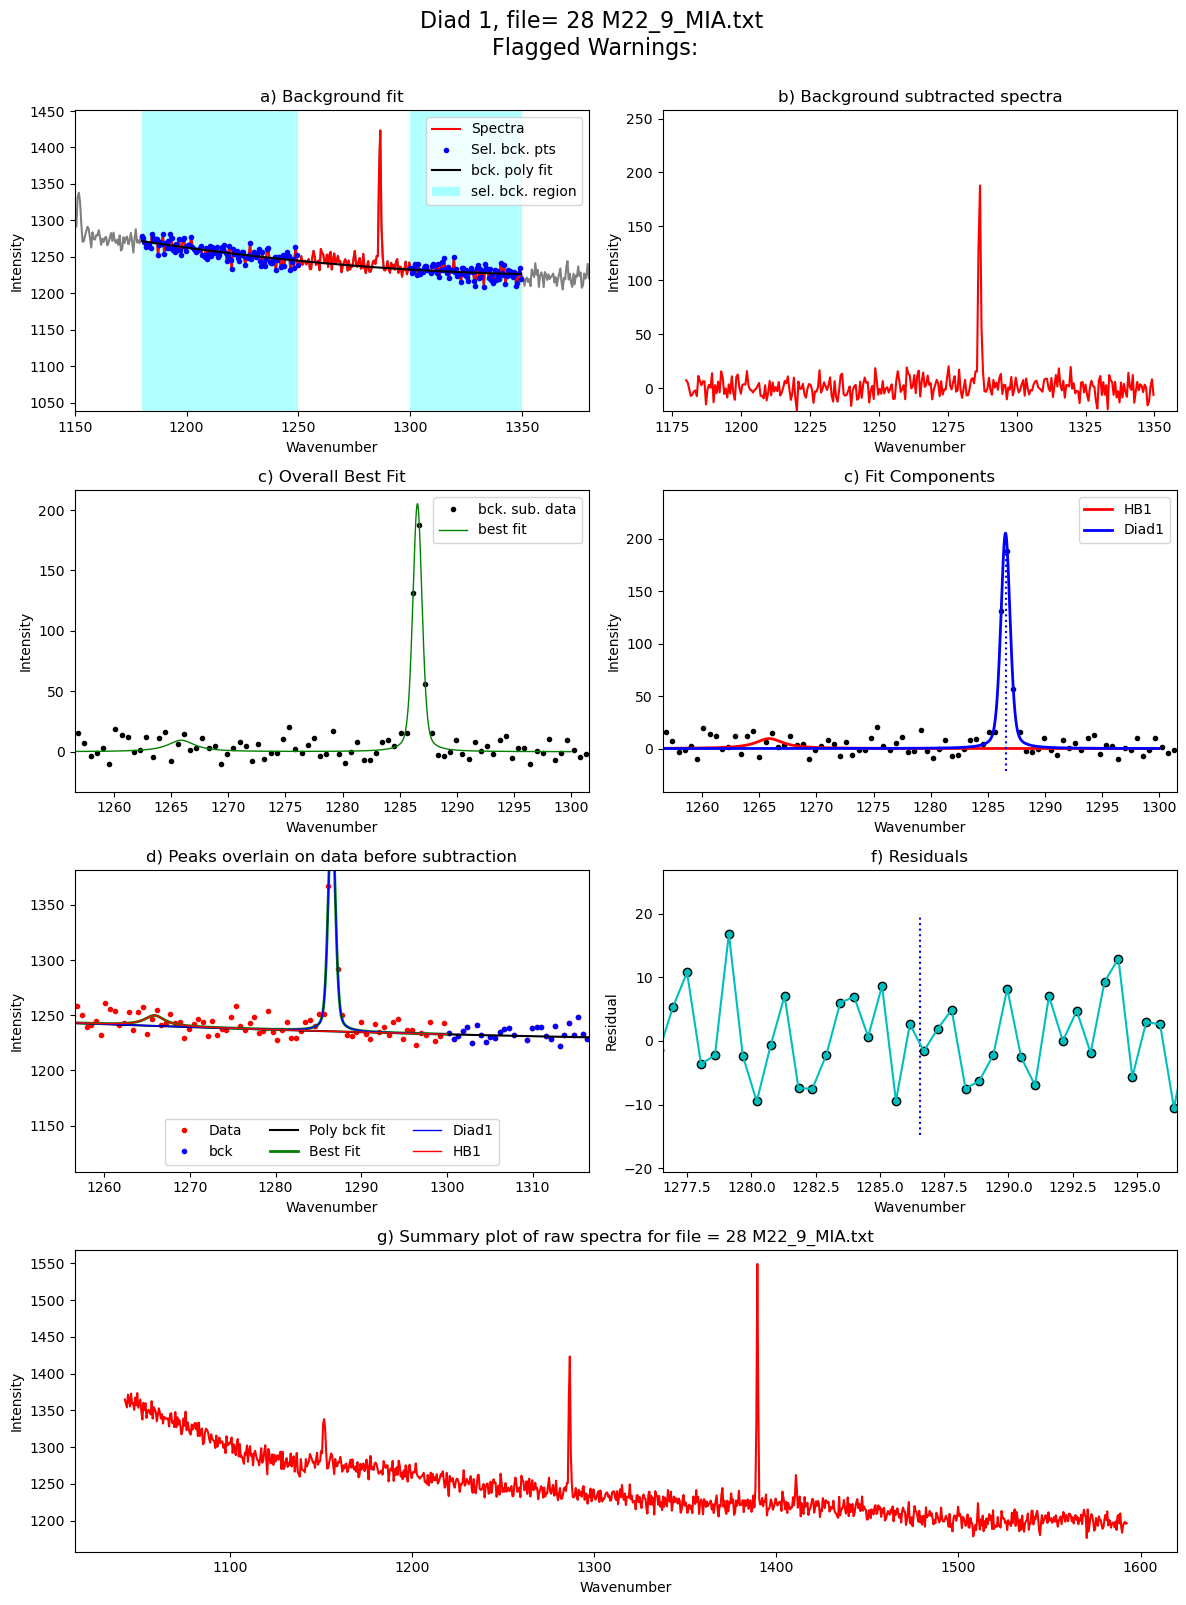

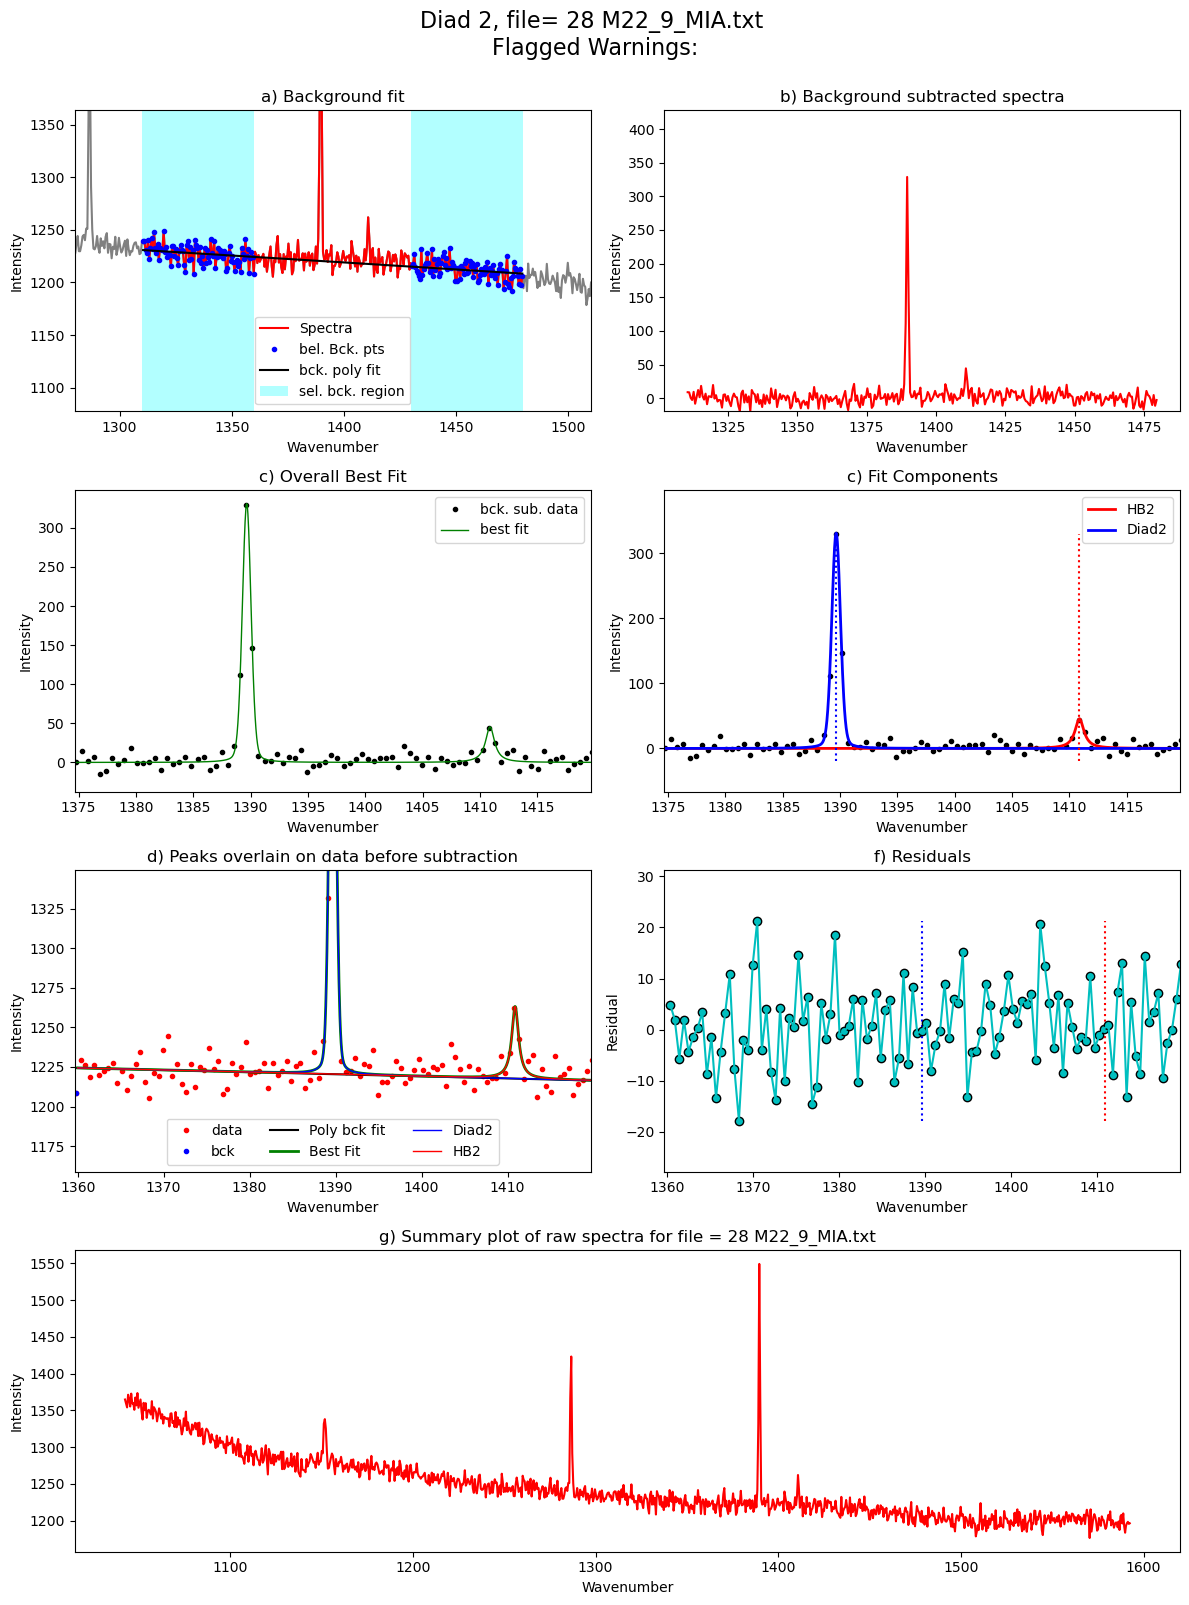

In [38]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [39]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)

In [40]:
combo.head()

filename   Splitting   Split_σ  \
0             ML22_7_FIA_CRR_DiadFit  103.530308  0.019238   
1  ML22_7_FIB_doublepeak_CRR_DiadFit  103.385355  0.060314   
2  ML22_7_FIC_doublepeak_CRR_DiadFit  102.321001  0.190615   
3            ML22_13_FIA_CRR_DiadFit  103.537160  0.018858   
4                        ML22_13_FIB  103.503198  0.015904   

   Diad1_Combofit_Cent  Diad1_cent_err  Diad1_Combofit_Height  \
0          1285.314359        0.017601             253.260032   
1          1285.528049        0.052234             120.258514   
2          1285.471438        0.119073              52.132844   
3          1285.249648        0.016927             563.380013   
4          1285.390986        0.014520             387.458317   

   Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  Diad1_Residual  ...  \
0       1285.314359        504.813674           0.736764        5.263278  ...   
1       1285.528099        220.963784           0.688186        8.063553  ...   
2       1285.471438        121.380864           0.738874        6.876600  ...   
3       1285.249698       1449.173214           0.819091       10.786904  ...   
4       1285.391036        852.621271           0.808852        5.683251  ...   

   HB2_Sigma  C13_Cent C13_Area  C13_Sigma  Diad2_Gauss_Cent  \
0   1.248366       NaN      NaN        NaN               NaN   
1   0.348045       NaN      NaN        NaN               NaN   
2   1.108024       NaN      NaN        NaN               NaN   
3   1.166856       NaN      NaN        NaN               NaN   
4   0.926584       NaN      NaN        NaN               NaN   

   Diad2_Gauss_Area  Diad2_Gauss_Sigma  Diad1_Gauss_Cent  Diad1_Gauss_Area  \
0               NaN                NaN               NaN               NaN   
1               NaN                NaN               NaN               NaN   
2               NaN                NaN               NaN               NaN   
3               NaN                NaN               NaN               NaN   
4               NaN                NaN               NaN               NaN   

   Diad1_Gauss_Sigma  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 39 columns]